# Importing Required Packages

In [1]:
# Installing necessary libraries
!pip install xgboost --user
!pip install imblearn --user

In [2]:
# Libraries for data management
import pandas as pd
import numpy as np
from calendar import month_name

# Libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
import scipy.stats as stats

# Libraries for data cleaning/pre-processing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.decomposition import PCA, FactorAnalysis
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Libraries for model building
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, recall_score, precision_score, f1_score,
                             confusion_matrix, make_scorer, roc_curve, roc_auc_score)

# Libraries for resampling (addressing imbalanced classes issue)
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import TomekLinks, RandomUnderSampler

# Mounting the drive
#from google.colab import drive
#drive.mount('/content/drive/')

# Setting the theme and fontsize of figures
sns.set_theme(style = 'darkgrid', font_scale = 1.14)
# Restricting the float value of a dataframe to 3 decimal points
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# Removing the limit for the number of displayed columns in a dataframe
pd.set_option("display.max_columns", None)

## Reading the Data

In [3]:
#df_orig = pd.read_csv('/content/drive/MyDrive/Python_files/exercise_40_train.csv')
df_orig = pd.read_csv('exercise_40_train.csv')
# Ensuring the original data remains untouched
df = df_orig.copy()

In [4]:
# Shape of dataset
print('The dataset is made up of {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

The dataset is made up of 40000 rows and 101 columns.


In [5]:
# Showing the column types
df.info(max_cols = df.shape[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 101 columns):
 #    Column  Non-Null Count  Dtype  
---   ------  --------------  -----  
 0    y       40000 non-null  int64  
 1    x1      40000 non-null  float64
 2    x2      40000 non-null  float64
 3    x3      40000 non-null  object 
 4    x4      40000 non-null  float64
 5    x5      37572 non-null  float64
 6    x6      40000 non-null  float64
 7    x7      40000 non-null  object 
 8    x8      40000 non-null  float64
 9    x9      40000 non-null  float64
 10   x10     40000 non-null  float64
 11   x11     34890 non-null  float64
 12   x12     40000 non-null  float64
 13   x13     40000 non-null  float64
 14   x14     30136 non-null  float64
 15   x15     40000 non-null  float64
 16   x16     28788 non-null  float64
 17   x17     40000 non-null  float64
 18   x18     40000 non-null  float64
 19   x19     40000 non-null  object 
 20   x20     40000 non-null  float64
 21   x21     40

#### Notes:

*   As can be seen, there are 12 object-type, 3 integer-type and 86 float-type variables. As we will see later, these are not the exact numbers of categorical and numerical variables, as, e.g., some integer or float variables might be inherently categorical, and some variables might have been deemed object-type only due to the presence of some special characters. 
*   Also, we can see that a noticeable amount of entries are missing, requiring careful and comprehensive missing value treatment before building the classification models. 

In [6]:
# Checking the head and bottom of the dataset
print('The first five rows of the dataset:')
display(df.head())
print('\nThe last five rows of the dataset:')
display(df.tail())

The first five rows of the dataset:


y    x1     x2        x3    x4     x5     x6        x7     x8    x9    x10  \
0  0 0.165 18.060       Wed 1.077 -1.339 -1.584   0.0062%  0.221 1.816  1.172   
1  1 2.441 18.416    Friday 1.483  0.921 -0.760   0.0064%  1.192 3.514  1.420   
2  1 4.427 19.188  Thursday 0.146  0.366  0.710   -8e-04%  0.952 0.783 -1.247   
3  0 3.925 19.901   Tuesday 1.764 -0.252 -0.827  -0.0057% -0.521 1.826  2.223   
4  0 2.869 22.202    Sunday 3.405  0.083  1.382   0.0109% -0.733 2.152 -0.275   

      x11    x12   x13   x14    x15     x16   x17    x18                 x19  \
0 109.627  4.645 4.815 1.542 -0.587 101.906 4.278 77.710  $-908.650758424405   
1  84.079  1.460 1.444   NaN -1.166 100.112 8.487 70.809   $-1864.9622875143   
2  95.375  1.099 1.216 0.451  0.212  99.215 8.601 75.923  $-543.187402955527   
3  96.420 -1.390 3.963   NaN -2.047     NaN 6.612 74.967  $-182.626380634258   
4  90.770  7.230 3.877 0.392 -1.202 100.627 9.103 77.977   $967.007090837503   

    x20    x21     x22    x23     x24   x25    x26      x27    x28   x29  x30  \
0 7.328 36.602 126.384  1.265  female 3.834  2.352  905.491 14.779 0.753  NaN   
1 6.796  3.789  93.037  0.346    male 4.345  1.652  868.784 25.915 1.445  NaN   
2 3.802  7.408  71.022  0.071    male 4.333 -0.376 1077.233 13.177 4.175  NaN   
3 7.729  8.136 121.611  0.701    male 7.295 -0.604 1051.655 17.007 2.347  NaN   
4 2.273 24.452  56.492 -1.102    male 6.314  0.429  949.905 16.963 0.511  NaN   

   x31    x32        x33    x34    x35    x36    x37    x38         x39  \
0   no -0.597   Colorado 46.667  3.159 69.445 32.450    NaN  5-10 miles   
1   no  1.127  Tennessee 47.929 -1.014 61.289 35.522 31.526  5-10 miles   
2   no  2.605      Texas 56.674  0.108 69.799 30.684 31.049  5-10 miles   
3   no  1.071  Minnesota 59.155  1.320 65.408 34.401 48.364  5-10 miles   
4  yes  2.284   New York 46.446  0.023 66.663 31.135 31.820  5-10 miles   

     x40        x41    x42    x43    x44    x45    x46    x47    x48    x49  \
0 18.129        NaN  0.905  1.227  0.703 -0.810  0.235 53.359 58.252 16.085   
1 11.389  99074.101 -1.158 -0.822 -0.851  2.652  1.105 37.729 56.053    NaN   
2 14.372 100087.340  0.870  0.151    NaN -0.857 -2.561 50.237 63.975  6.998   
3 13.191 100934.097    NaN -0.966    NaN  0.423 -2.123 41.857 59.226    NaN   
4 17.210        NaN    NaN  1.012    NaN -0.348  3.477 47.844 55.922    NaN   

       x50   x51    x52    x53    x54   x55    x56  x57     x58  x59  \
0 1602.756 2.740  7.618 72.167  0.166   NaN -1.533  NaN 300.630    0   
1 3350.838 1.996    NaN 73.965    NaN   NaN  0.956  NaN 300.630    0   
2 3756.910 1.773 15.057 59.429  1.844   NaN  4.128  NaN 182.369    0   
3 1961.610 3.155    NaN 68.671 -1.020 5.834  0.664  NaN 300.630    0   
4 2345.196 3.253 14.194 71.853  0.927 4.116 -2.274  NaN 149.725    0   

         x60   x61   x62    x63    x64       x65    x66    x67    x68    x69  \
0     August 9.841 6.600  1.252 46.993   farmers  1.212 12.897 15.263  0.519   
1      April 6.939 3.864  0.058 48.217  allstate  0.739 14.402 33.941 -0.140   
2  September 6.228 1.371 -0.240 54.121     geico -0.033 14.402 18.212 -0.820   
3  September 6.005 0.013  0.318 54.784     geico -0.467 14.402 14.630  1.389   
4    January 7.655 1.306  0.418 51.486     geico -0.196 14.402 12.228 -2.951   

    x70    x71    x72   x73    x74   x75    x76       x77    x78   x79    x80  \
0 0.544 -0.913 53.522 7.724    NaN   NaN    NaN  mercedes 51.288 1.000 11.131   
1 1.017 -0.000 46.798 7.260 -1.732 0.666 -2.871  mercedes 42.918   NaN 11.715   
2 1.011 -0.000 48.202 9.336  0.210 1.125 -3.559    subaru 55.020 1.000  5.661   
3 0.705 -1.511 49.883 5.661  1.607 1.726 -0.398    nissan 47.769 1.000  7.472   
4 1.097 -0.000 51.349 9.422  3.488 1.884  0.020    toyota 44.640 1.000  6.531   

     x81    x82   x83   x84     x85    x86    x87    x88    x89   x90    x91  \
0 -0.472 -3.262 0.086 0.383 126.935 47.873 -0.163  1.080 10.602 2.771 -0.397   
1  1.691 -4.789 4.685 2.139 102.410 46.585  1.252  1.224 10.4


The last five rows of the dataset:


y    x1     x2        x3     x4     x5    x6        x7     x8     x9  \
39995  0 1.593 19.628       Sun  0.795 -0.826 0.609  -0.0085%  2.184  3.202   
39996  0 1.709 17.133  Thursday -2.677  1.154 0.466   0.0077% -0.049  3.990   
39997  0 1.704 17.824    Monday -0.581    NaN 0.467  -0.0216%  0.905  2.976   
39998  0 3.963 20.286   Tuesday  0.430  0.050 1.822    1e-04% -0.401 -0.248   
39999  0 2.574 16.443  Thursday -1.166 -1.198 0.181   0.0034% -0.274 10.333   

         x10     x11    x12    x13    x14    x15     x16    x17    x18  \
39995 -0.723  94.820  4.784  0.221    NaN  1.520     NaN  8.076 90.001   
39996  1.468 115.786  3.683  3.581  0.987  0.801 100.311  4.905 76.554   
39997  0.229 107.939  1.141  2.859 -0.189 -1.343 100.860  5.787 86.793   
39998 -0.499  93.314 -0.627 -0.403  1.309  1.412 100.482  6.469 72.918   
39999  1.648 107.167  6.662  2.876  1.233 -1.300  99.458 11.682 74.793   

                      x19   x20    x21    x22    x23     x24   x25    x26  \
39995   $3750.51991954505 5.420 26.171 27.655 -0.121  female 5.326  2.105   
39996   $448.867118077561 2.803  6.048 66.489  0.507    male 9.717  2.295   
39997    $834.95775080472 7.352  2.048 73.651  1.086    male 4.911  1.158   
39998  $-48.1031003332715 7.670  6.654 87.874  0.692    male 3.011  1.572   
39999   $96.0017151741518 1.505  1.359 38.805 -0.129     NaN 2.550 -0.402   

           x27    x28   x29    x30  x31    x32       x33    x34   x35    x36  \
39995 1066.778 11.273 0.354    NaN   no -1.028       NaN 43.939 1.057 79.558   
39996  893.822 18.254 1.082    NaN  yes  0.029  Illinois 52.956 4.201 69.100   
39997  983.186  7.704 1.111 -0.476  yes  0.359       NaN 52.664 2.555 76.705   
39998  804.891 18.981 4.398    NaN   no  2.850      Ohio 47.389 2.200 65.784   
39999 1024.153 16.375 0.135    NaN   no  0.677   Florida 55.264 3.619 64.183   

         x37    x38         x39    x40       x41    x42    x43   x44    x45  \
39995 33.748 -0.522  5-10 miles 10.180 97792.133  0.907  1.584 4.071  3.389   
39996 29.864 95.130  5-10 miles 15.200       NaN  3.035 -0.548   NaN -1.179   
39997 29.921 53.455  5-10 miles 13.760 98811.451 -0.189  1.732   NaN -0.790   
39998 29.237 73.427  5-10 miles 10.773 97926.385    NaN  0.831   NaN    NaN   
39999 34.463 44.637  5-10 miles 18.812       NaN  0.119 -2.475   NaN -1.112   

         x46    x47    x48   x49      x50   x51    x52    x53    x54   x55  \
39995  1.095 46.141 56.631 9.657 3566.625 1.862    NaN 64.838    NaN 4.972   
39996  1.113 51.109 63.109   NaN 1093.608 5.792  3.506 73.389 -1.308 3.029   
39997  0.018 58.108 59.923   NaN 2330.832 1.726 -1.126 68.035 -1.038   NaN   
39998  0.705 41.613 58.407 6.187 3247.967 2.981 20.450 67.261    NaN   NaN   
39999 -2.008 46.643 65.801   NaN 2860.194 2.923 23.661 69.681 -1.233   NaN   

         x56  x57     x58  x59       x60    x61   x62    x63    x64  \
39995 -0.195  NaN 300.630    0      July    NaN 5.427 -2.645 46.251   
39996 -0.782  NaN 445.078    0      July 12.224 4.212  0.076 48.663   
39997  0.574  NaN 300.630    0    August 13.098 8.590  0.123 48.656   
39998 -1.778  NaN 300.630    0  December  6.897 2.485  0.777 51.223   
39999  0.021  NaN 300.630    1   January    NaN 2.180  1.108 50.606   

               x65    x66    x67    x68    x69   x70    x71    x72   x73  \
39995      farmers  0.287 14.402    NaN  0.241 1.332 -0.000 48.956 7.595   
39996  progressive -0.061 14.402 11.506  1.954 0.406 -0.000 50.555 0.205   
39997        geico -0.070 11.197 15.579  1.538 0.783 -0.000 53.679 1.864   
39998      farmers -0.087 14.402 21.403 -1.303 1.198 -0.000 51.292 2.710   
39999  progressive -1.121 14.402 16.092  2.337 0.562 -0.000 36.738 2.550   

         x74    x75    x76     x77    x78   x79    x80    x81    x82   x83  \
39995 -2.946 -0.217    NaN     NaN    NaN 1.000 10.149 -1.256 -6.752 3.595   
39996 -0.869  0.410 -0.525    ford 45.960 1.000 11.572  0.767 -6.585 1.274   
39997  1.133  2.432    NaN    ford 54.447 1.000 12.975 -2.302 -7.506 0.502   
399

## Initial Sanity Checks and Data Cleaning

In [7]:
# Finding integer columns
int_cols = df.select_dtypes(include = int).columns.tolist()
int_cols

['y', 'x59', 'x98']

In [8]:
# Converting 0/1 integer columns (except for the target variable) into categorical ones with no/yes
df['x59'].replace([0, 1], ['no', 'yes'], inplace = True)
df['x98'].replace([0, 1], ['no', 'yes'], inplace = True)

#### Notes:

The integer variables are inherently categorical with only two classes, so, in order to analyze them better during EDA, with the exception of the target variable, I choose to convert them to categorical variables.

In [9]:
# Finding columns with special characters (% and $) and converting them to float (as they originally are)
cols_with_special_chars = []
for col in df.select_dtypes(include = 'object').columns.tolist():
    for i in range(df.shape[0]):
        if(isinstance(df.loc[i, col], str)):
          if(('$' in df.loc[i, col]) or ('%' in df.loc[i, col])):
            cols_with_special_chars.append(col)
            break
        else:
          continue
print('Columns with special characters:', cols_with_special_chars) 

Columns with special characters: ['x7', 'x19']


In [10]:
# Converting columns with special characters to numerical ones
for col in cols_with_special_chars:
  if('%' in df.loc[0, col]):
    df[col] = df[col].map(lambda x: float(x.split('%')[0]))
  elif('$' in df.loc[0, col]):
    df[col] = df[col].map(lambda x: float(x.split('$')[1]))

#### Notes:

Two columns in the data are, in fact, numerical variables, but, due to the presence of some special chatacters (% and $), have been considered object-type by Python. Above actions have fixed the issue.

In [11]:
# Dropping column 39 because it only has one class
one_class_features = []
for col in df.columns.tolist():
    if(df[col].nunique(dropna = False) == 1):
      one_class_features.append(col)
print('Features with only one class:', one_class_features)
for col in one_class_features:
    df.drop(columns = col, inplace = True)

Features with only one class: ['x39']


#### Notes:

Here, I dropped all features with only one class (one unique value) present in them (I counted missing values as a separate class), as they don't carry any value for classification.

In [12]:
# Inspecting the duplicated records
print('No. of duplicated records in the dataset:', df.duplicated().sum())

# Finding all columns with missing values
cols_with_missing_values = []
for col in df.columns.tolist():
    if(df[col].isnull().sum()):
      cols_with_missing_values.append(col)
print('No. of features with missing values:', len(cols_with_missing_values))

No. of duplicated records in the dataset: 0
No. of features with missing values: 42


#### Notes:

*   Thankfully, there is no duplicated rows in the dataset.
*   A very large number of features have missing values (42), meaning that missing value treatment and other steps with regard to data cleaning are very vital towards solving the classification problem.

In [13]:
# Finding all categorical features with missing values
cat_cols_with_missing_values = []
for col in cols_with_missing_values:
    if(df[col].dtypes == 'object'):
      cat_cols_with_missing_values.append(col)
print('Categorical variables with missing values:', cat_cols_with_missing_values)

Categorical variables with missing values: ['x24', 'x33', 'x77', 'x99']


In [14]:
# Fraction of missing values for categorical columns
print('Fraction of missing values for each categorical variable:')
for col in cat_cols_with_missing_values:
  print(col + ': ' + str(round(df[col].isnull().sum()/df.shape[0], 3)))  

Fraction of missing values for each categorical variable:
x24: 0.096
x33: 0.179
x77: 0.231
x99: 0.321


#### Notes:

*   None of the categorical variables in the data has majority of its values missing, therefore I choose to retain all these categorical features, and treat their missing values by creating a new class, labeled as unknown or other. 
*   Categorical variables not stated above have no missing values.

In [15]:
# Filling out categorical features with missing values
df.loc[df['x24'].isnull(), 'x24'] = 'other'
df.loc[df['x33'].isnull(), 'x33'] = 'unknown'
df.loc[df['x77'].isnull(), 'x77'] = 'unknown'
df.loc[df['x99'].isnull(), 'x99'] = 'unknown'

In [16]:
# Checking the number of missing values for categorical variables (which used to have missing values)
print('No. of missing values for categorical variables after imutation:')
df[cat_cols_with_missing_values].isnull().sum()

No. of missing values for categorical variables after imutation:


x24    0
x33    0
x77    0
x99    0
dtype: int64

#### Notes:

Missing value treatment for categorical variables done successfully!

In [17]:
# Getting rid of the repititions in day of the week
print('Original unique values of x3:\n', df.x3.unique(), sep = '')
df.x3.replace(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
              ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'], inplace = True)
print('Unique values of x3 after corrections:\n', df.x3.unique(), sep = '')

Original unique values of x3:
['Wed' 'Friday' 'Thursday' 'Tuesday' 'Sunday' 'Saturday' 'Sat' 'Wednesday'
 'Sun' 'Tue' 'Thur' 'Monday' 'Fri' 'Mon']
Unique values of x3 after corrections:
['Wed' 'Fri' 'Thur' 'Tue' 'Sun' 'Sat' 'Mon']


#### Notes:

Looking at the head and bottom of the dataset showed that days of the week are spelled in two different ways: abbreviated and complete. Here, I've merged the two ways.

In [18]:
# Storing all numerical features with missing values and the fraction of 
# missing values in each in a dataframe
num_cols_with_missing_values = pd.DataFrame(columns = ['Feature', 'Fraction of Missing Values'])
majority_missing_cols = [] # features with more than 50% missing values
i = 0
for col in cols_with_missing_values:
    if((df[col].dtypes == float) or (df[col].dtypes == int)):
      num_cols_with_missing_values.loc[i, 'Feature'] = col
      num_cols_with_missing_values.loc[i, 'Fraction of Missing Values'] = df[col].isnull().sum()/df.shape[0]
      if(df[col].isnull().sum()/df.shape[0] > 0.5):
          majority_missing_cols.append(col) 
      i += 1
num_cols_with_missing_values.sort_values(by = 'Fraction of Missing Values',
                                         ascending = False, inplace = True)
print('Fraction of missing values for each numerical feature:')
display(num_cols_with_missing_values)
print('\nFeatures with more than 50% missing values:', majority_missing_cols)

Fraction of missing values for each numerical feature:


Feature Fraction of Missing Values
10     x44                      0.856
16     x57                      0.812
6      x30                      0.808
15     x55                      0.442
13     x52                      0.405
22     x74                      0.323
12     x49                      0.321
14     x54                      0.318
36     x95                      0.315
25     x78                      0.284
3      x16                      0.280
32     x89                      0.267
2      x14                      0.247
9      x42                      0.243
29     x85                      0.243
8      x41                      0.238
11     x45                      0.200
17     x61                      0.182
37     x96                      0.166
33     x91                      0.131
27     x80                      0.131
24     x76                      0.131
23     x75                      0.131
1      x11                      0.128
19     x64                      0.128
34     x92                      0.061
5      x26                      0.061
26     x79                      0.061
28     x83                      0.061
0       x5                      0.061
20     x67                      0.061
18     x63                      0.060
30     x86                      0.060
7      x38                      0.060
4      x22                      0.060
21     x68                      0.060
35     x94                      0.059
31     x88                      0.058


Features with more than 50% missing values: ['x30', 'x44', 'x57']


In [19]:
# Dropping features whose majority of entries are not available
df.drop(columns = majority_missing_cols, inplace = True)

#### Notes:

*   The percentge of missing values for various numerical variables (with missing values) range from about 6% to more than 80%. 
*   I choose to drop the three features for which more than 80% of entries are missing, as they seem beyond repair. The KDE plots of these variables w.r.t. the target class, also seemed very similar to one another, indicating that they're not very helpful for classification.
*   Numerical features not stated above have no missing values.

## EDA: Univariate Analysis

In [20]:
# Auxiliary function for annotating the bars in a countplot
def countplot_labeling(cntplt, data, perc = True, decimal = 1):
  ''' This function gets a countplot and the dataset that has generated
  the plot to produce the values corresponding to each bar (category).
  If perc = True, percentages will be shown.'''

  from math import isnan

  total = data.shape[0]  # total number of values in the dataset
  for p in cntplt.patches:
        height_val = float(p.get_height())
        if(isnan(height_val)):
          height_val = 0
        if(abs(height_val - round(height_val)) < 1e-6):
          height_val = int(height_val)  
        if perc == True:
          # percentage of each category
          label = "{:.1f}%".format(100*height_val/total)
        else:
          label = "{}".format(round(height_val,decimal))  # count of each category
        x = p.get_x() + p.get_width()/2  # width of the plot
        y = p.get_height()  # height of the plot

        if(height_val == 0):
          label = '0'

        # annotate the bar
        cntplt.annotate(label, (x, y), ha = "center", va = "center", size = 12, xytext = (0, 5), 
                        textcoords = "offset points")  

In [21]:
# Listing categorical and numerical features
cat_cols = df.select_dtypes(include = 'object').columns.tolist()
num_cols = df.select_dtypes(include = np.number).columns.tolist()
num_cols.remove('y')

### Numerical Variables

/tmp/ipykernel_80279/975662576.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (16, 4));


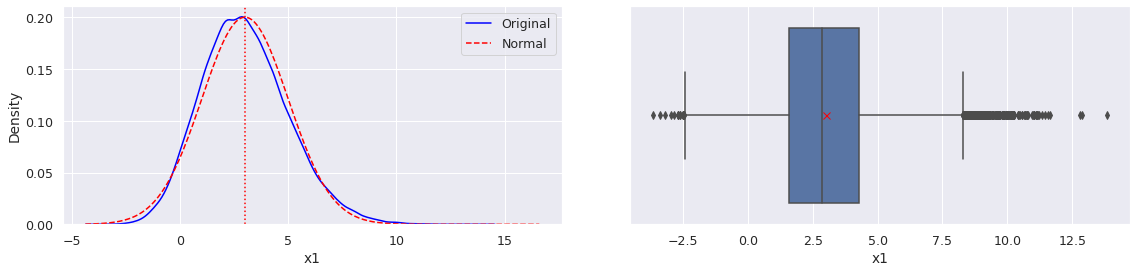

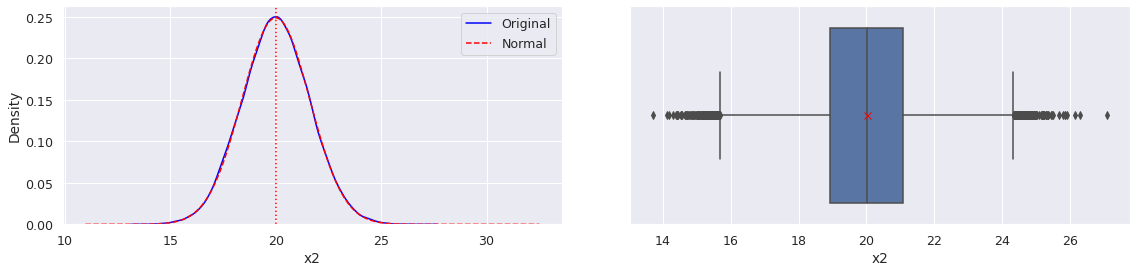

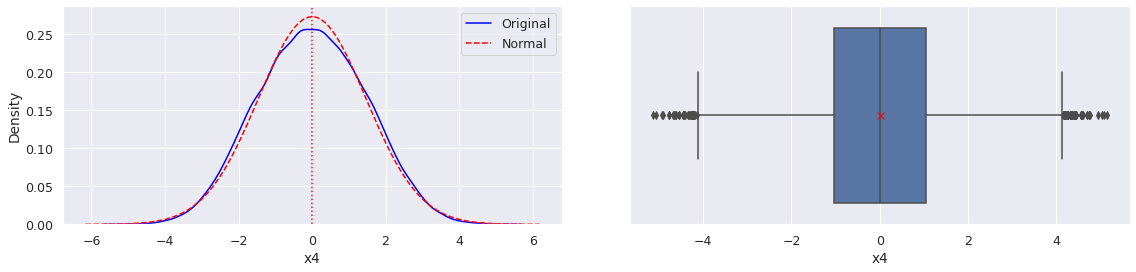

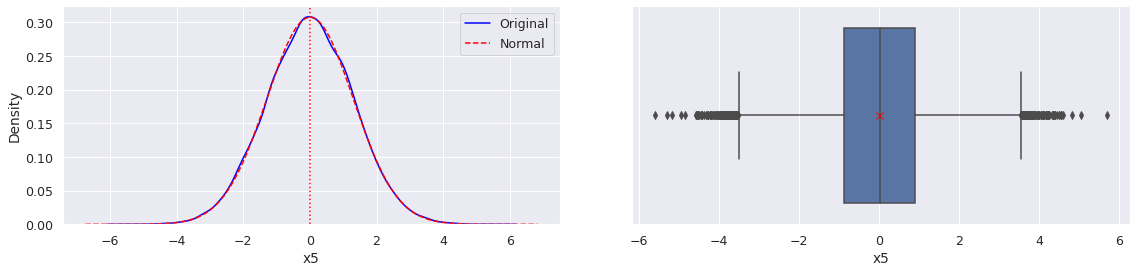

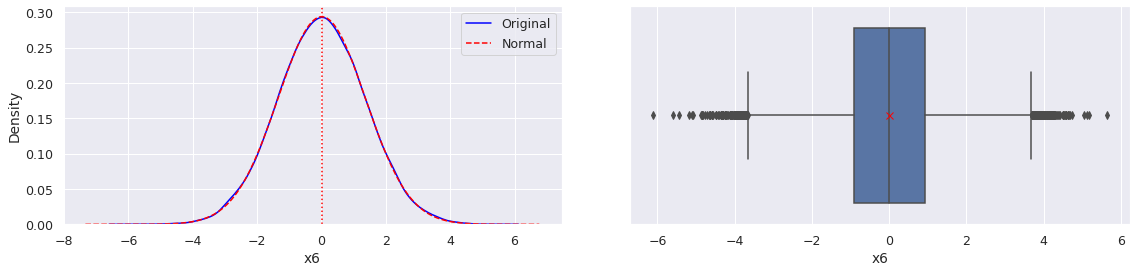

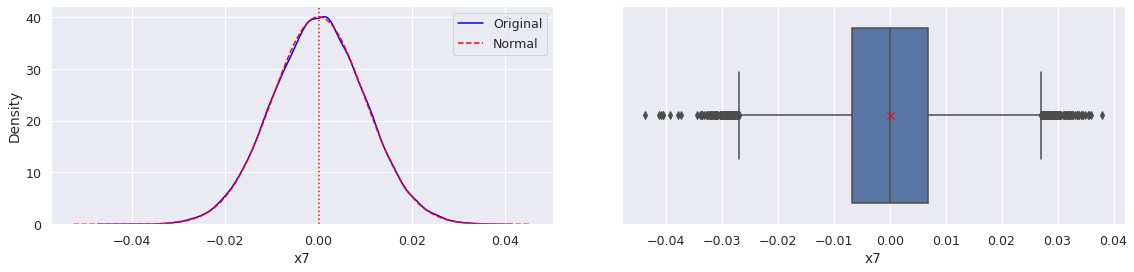

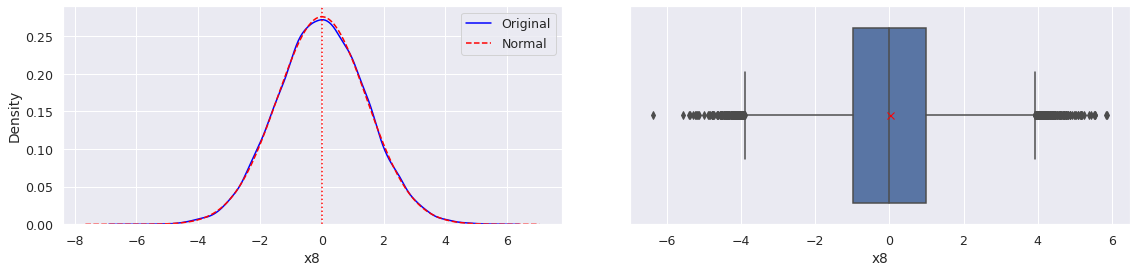

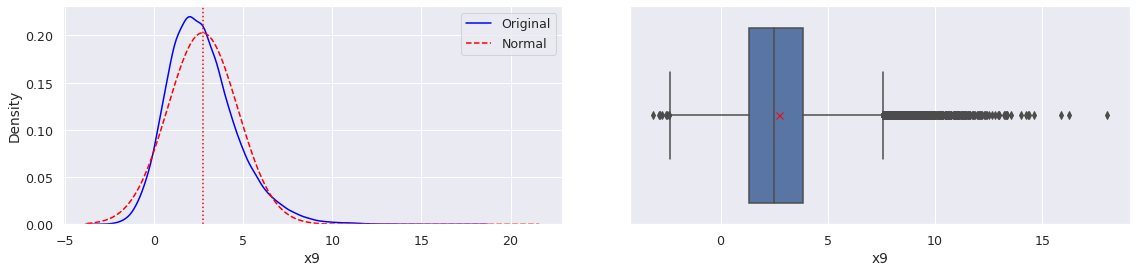

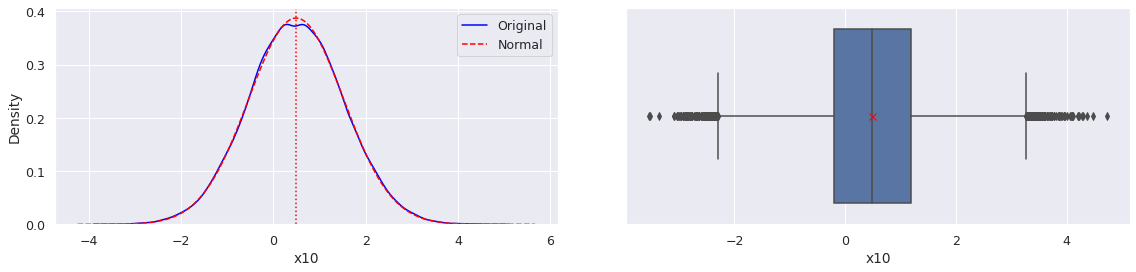

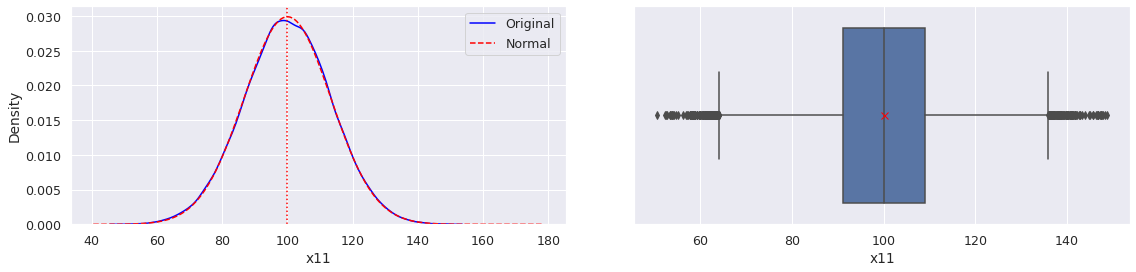

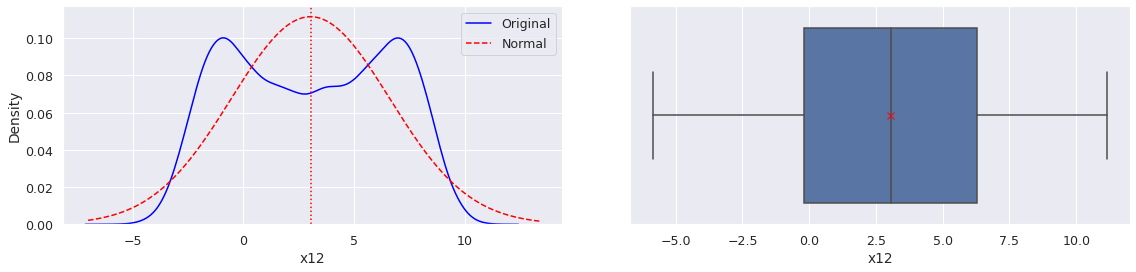

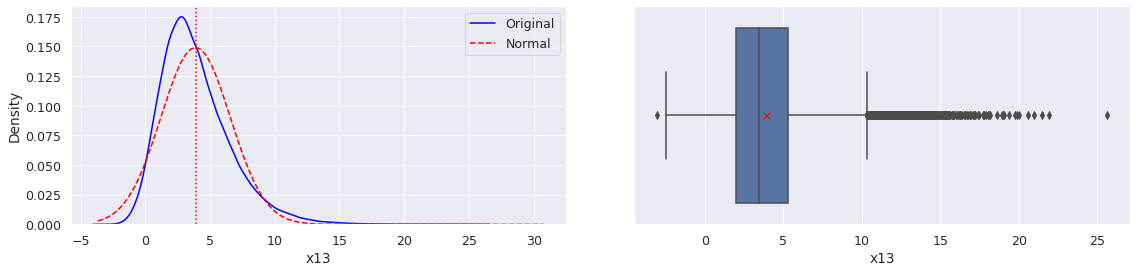

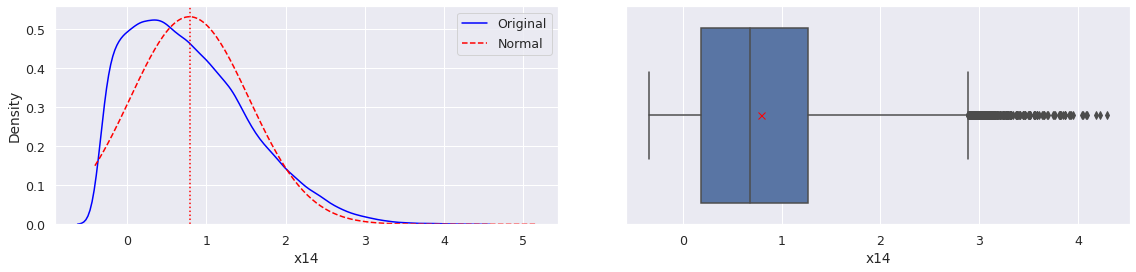

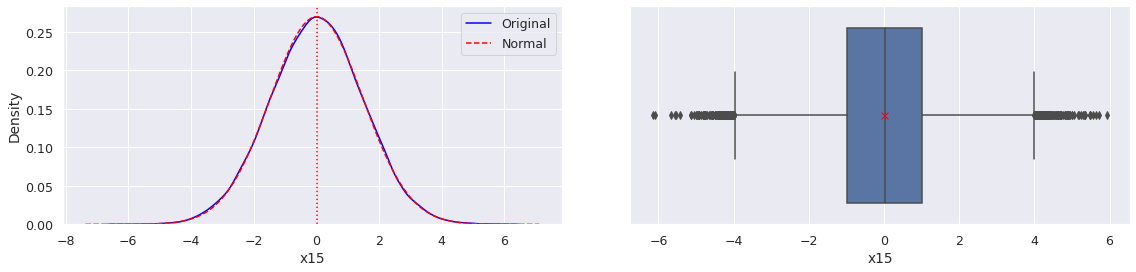

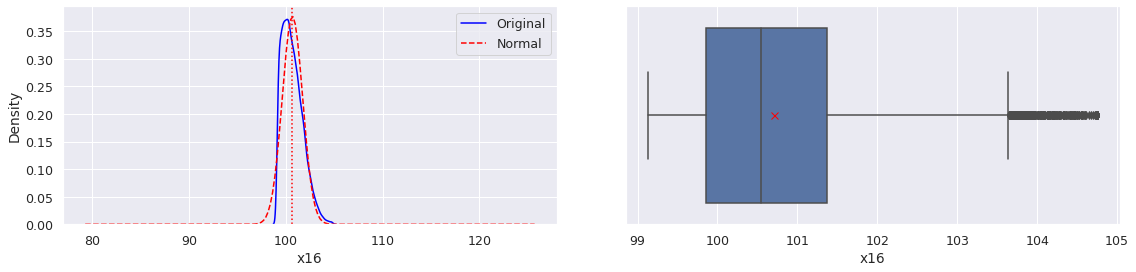

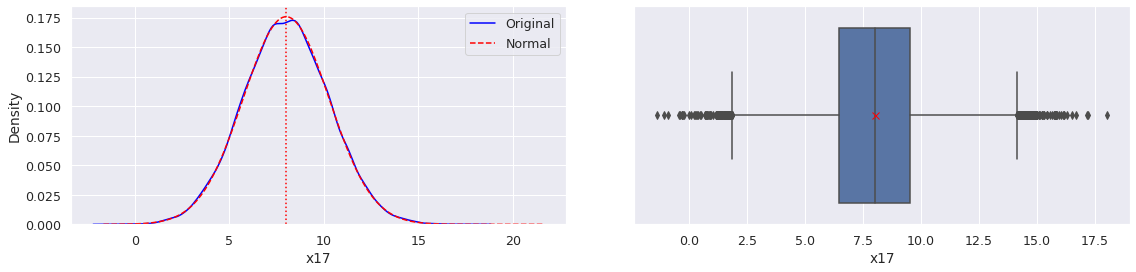

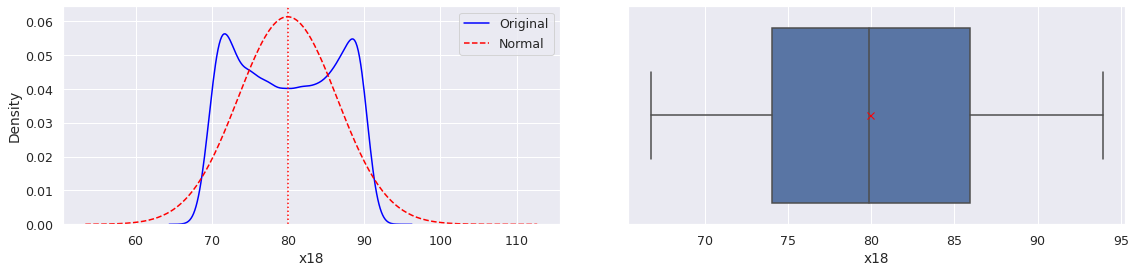

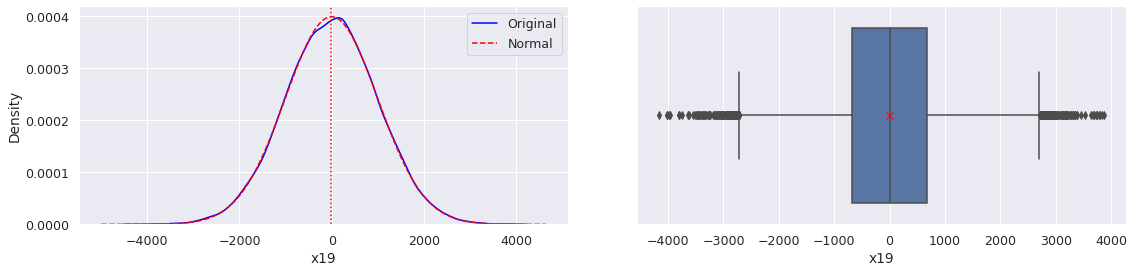

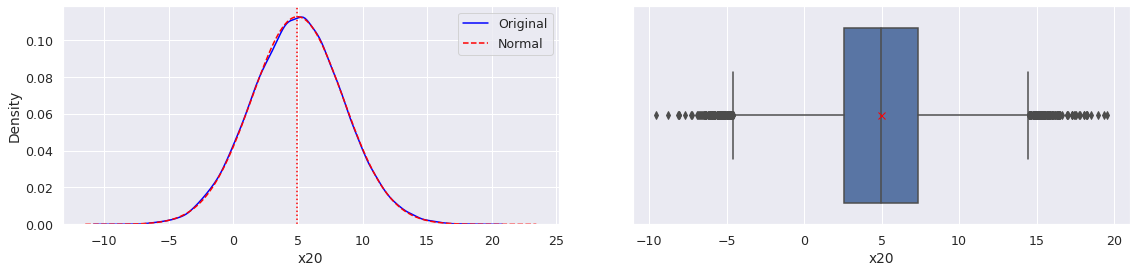

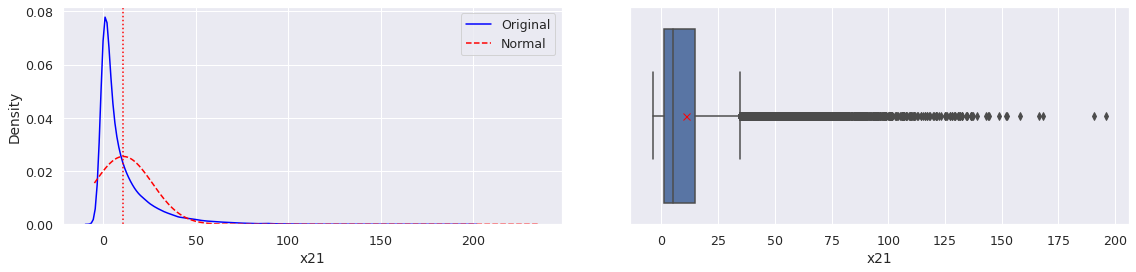

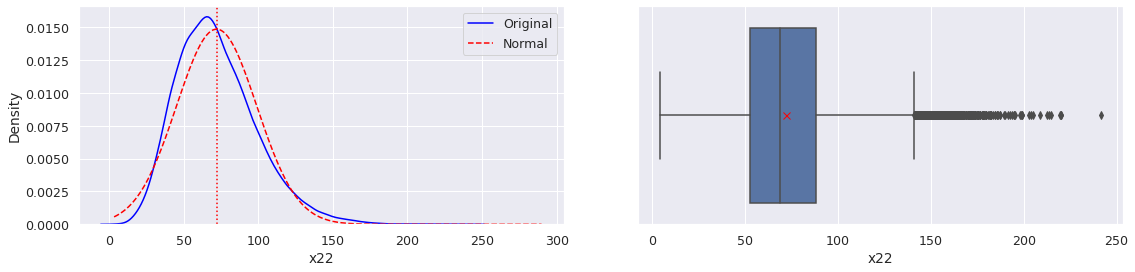

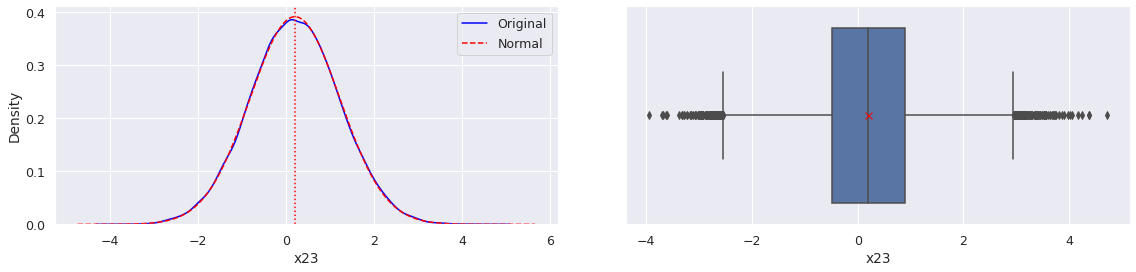

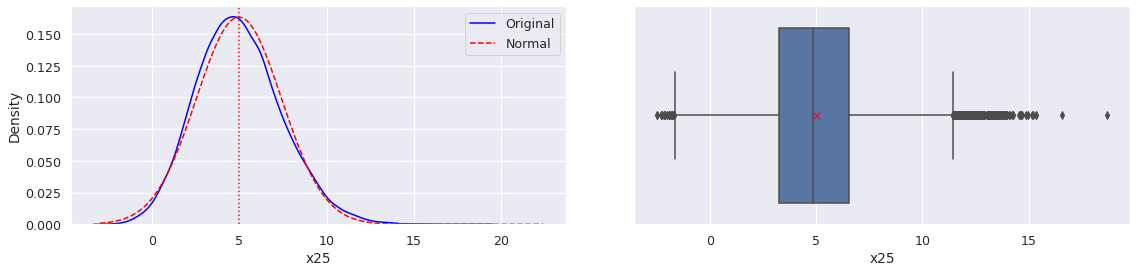

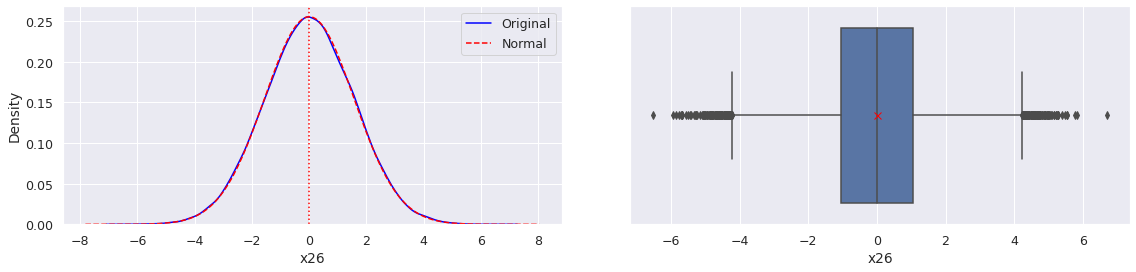

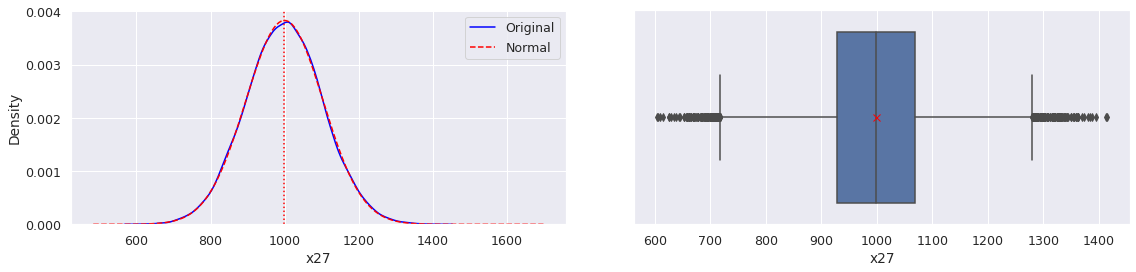

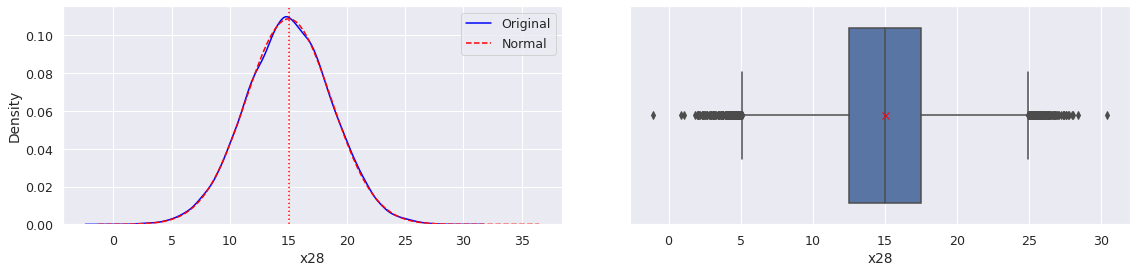

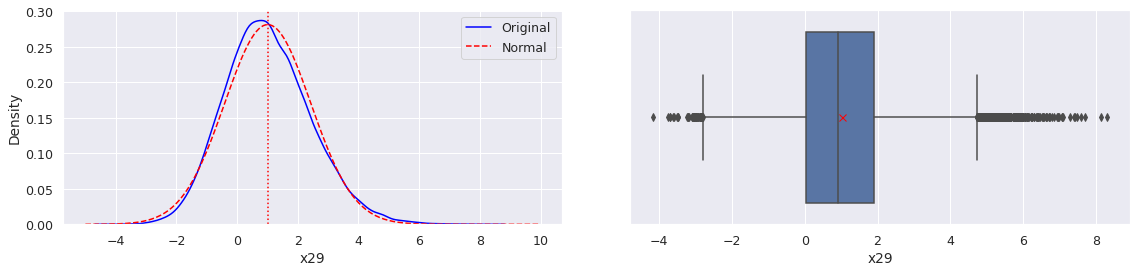

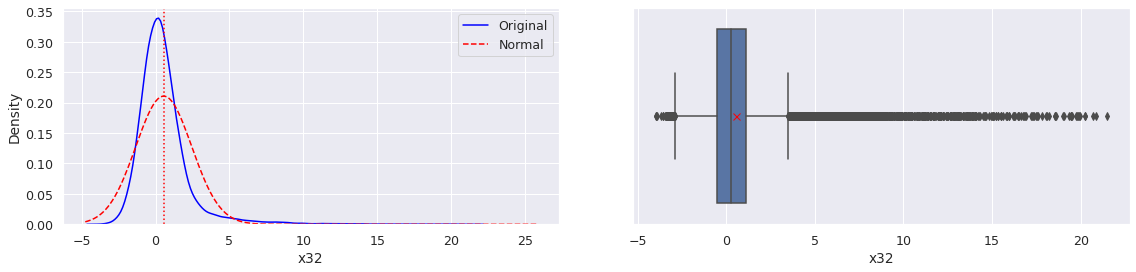

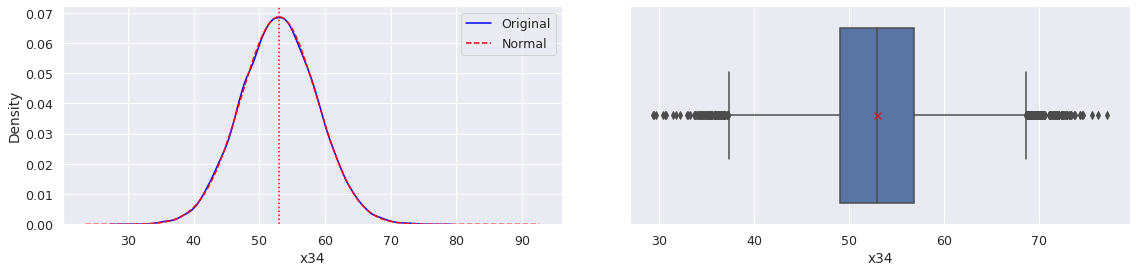

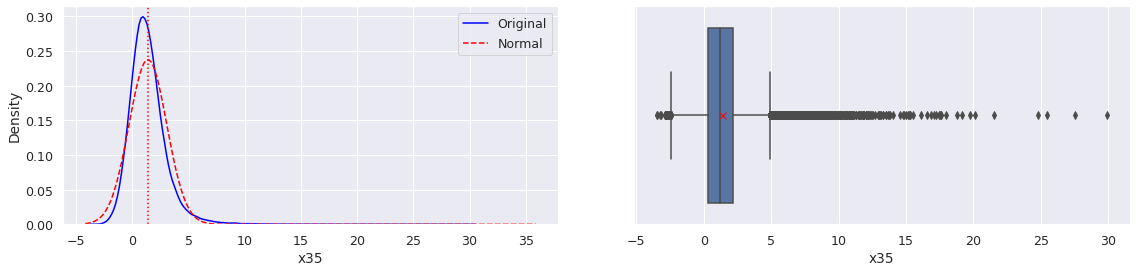

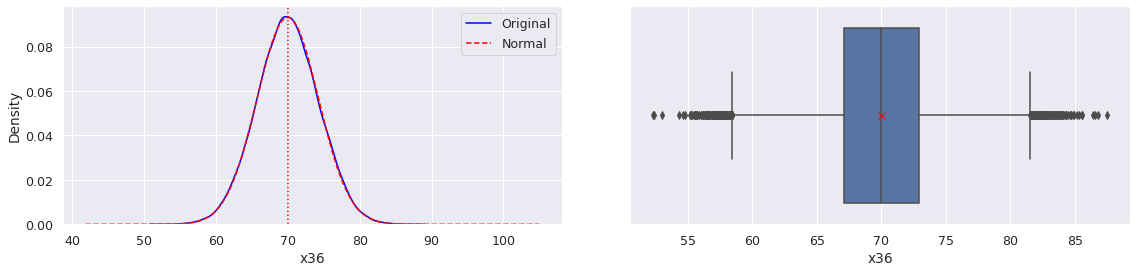

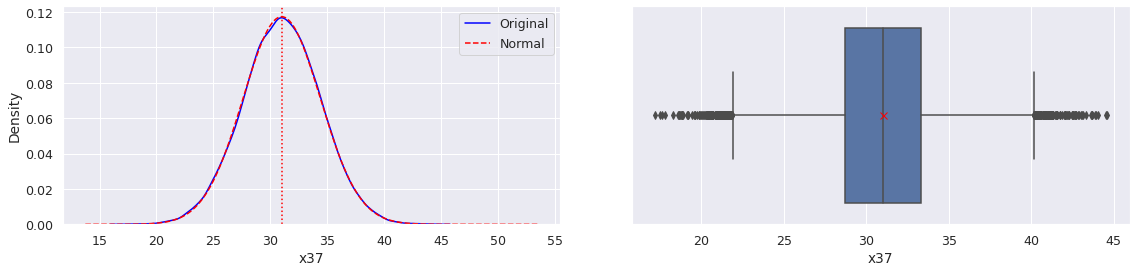

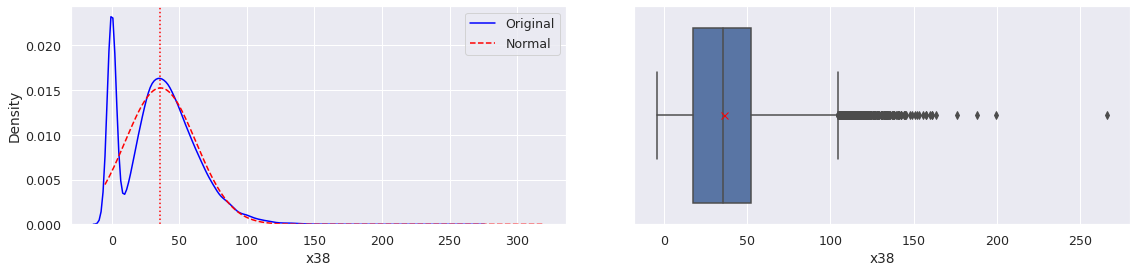

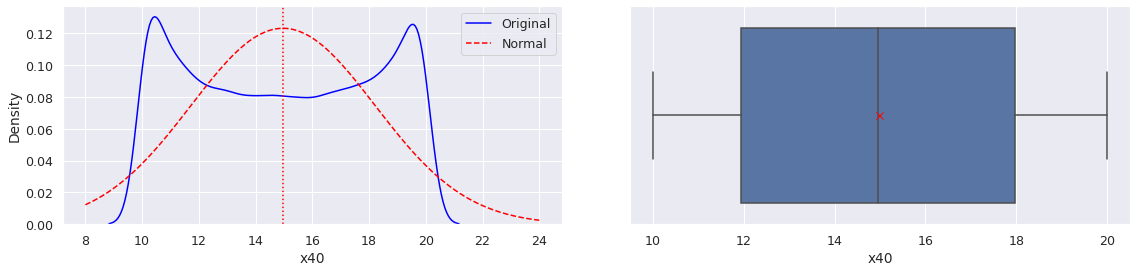

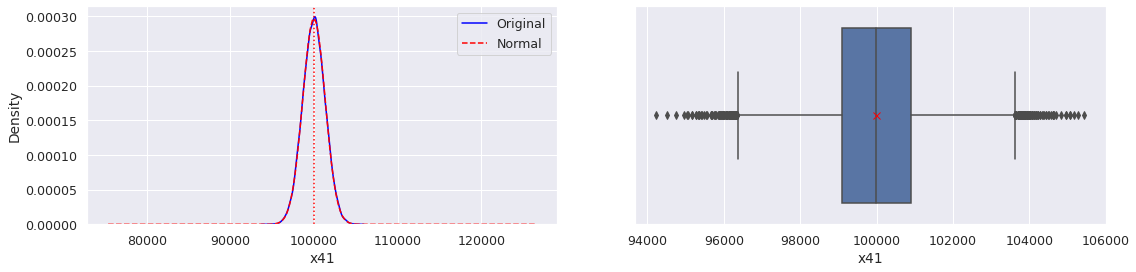

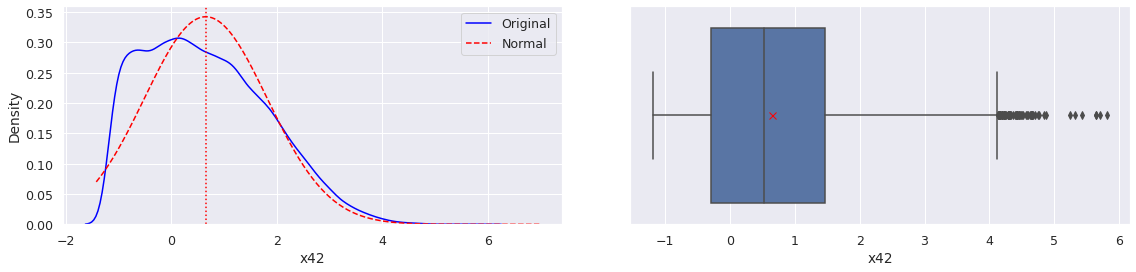

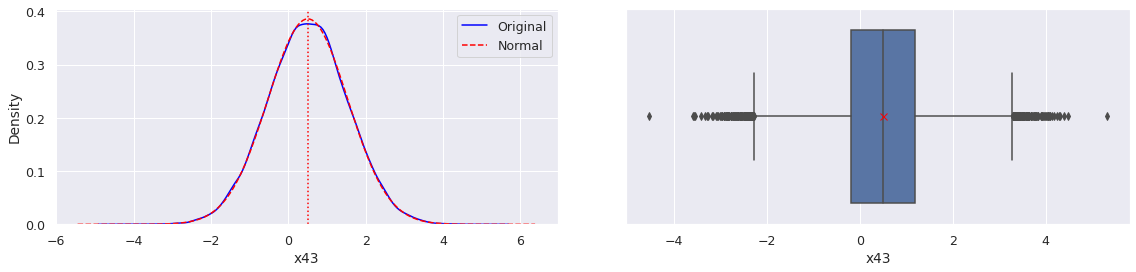

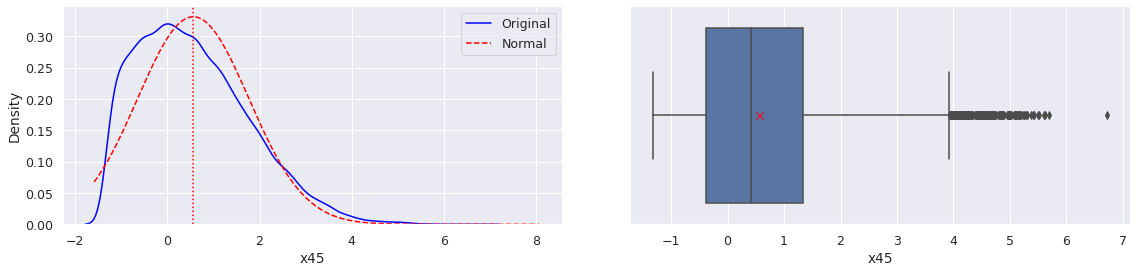

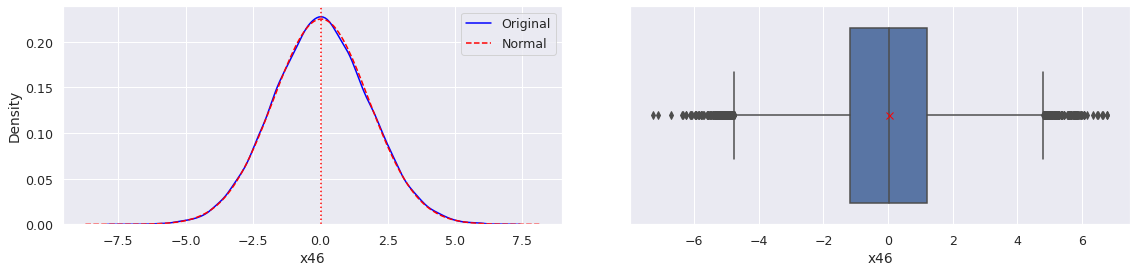

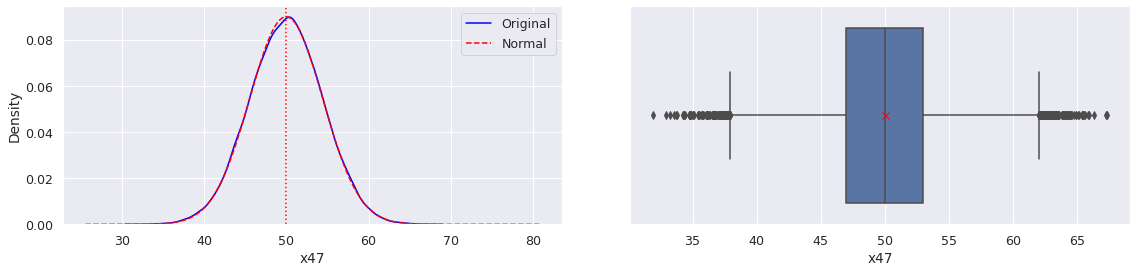

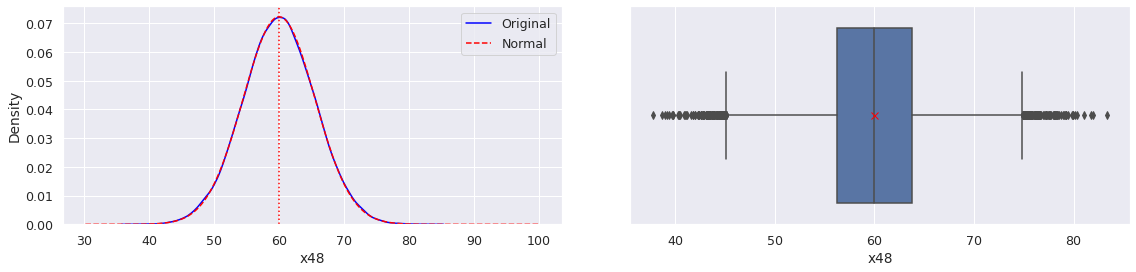

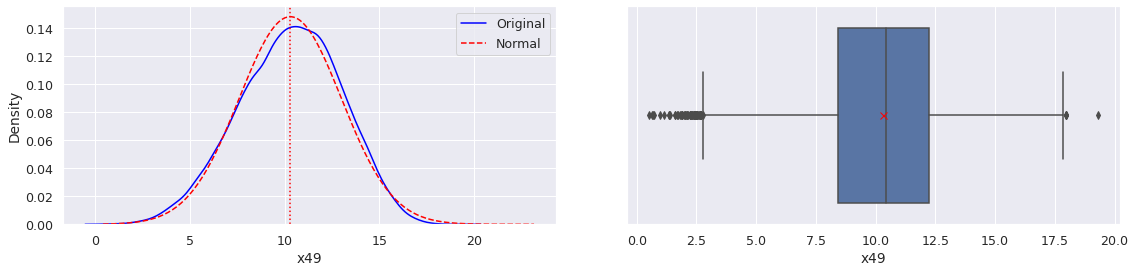

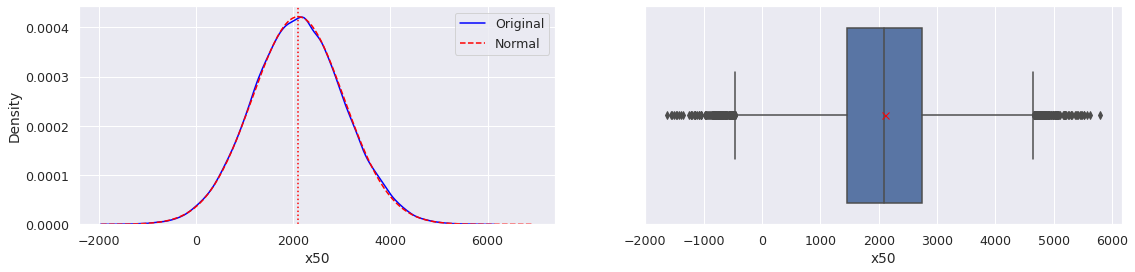

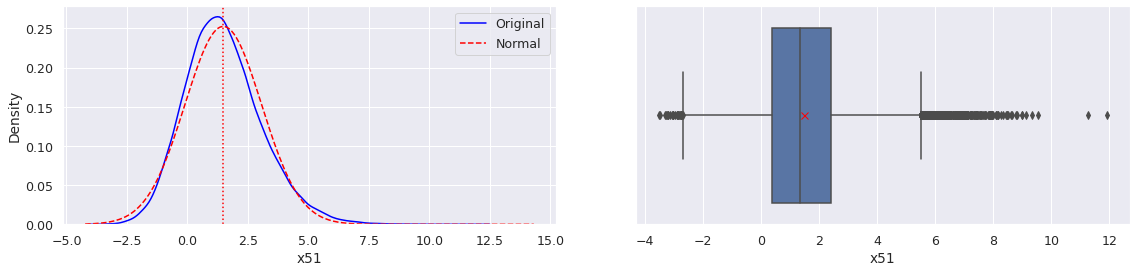

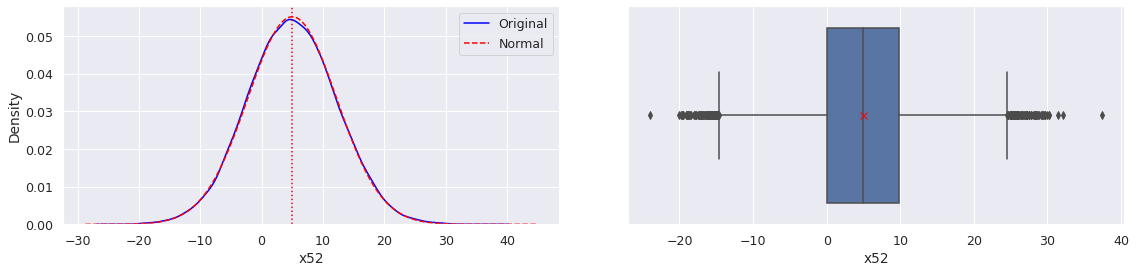

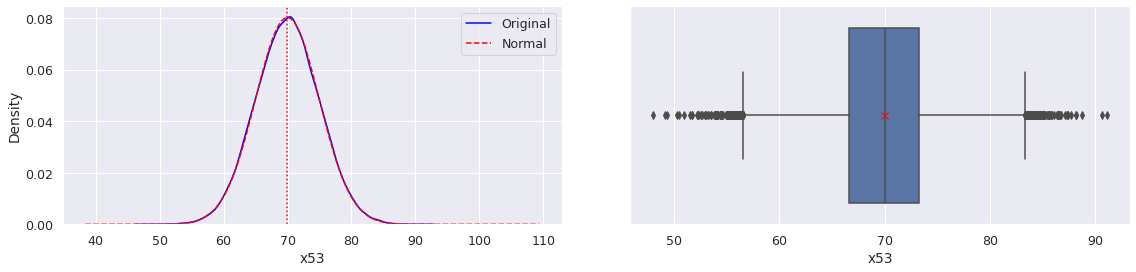

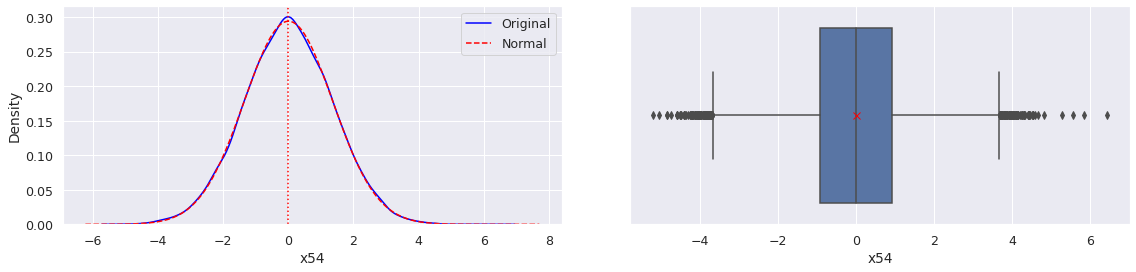

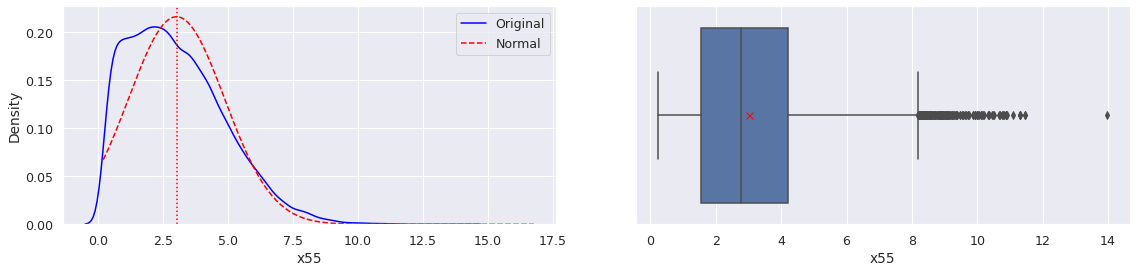

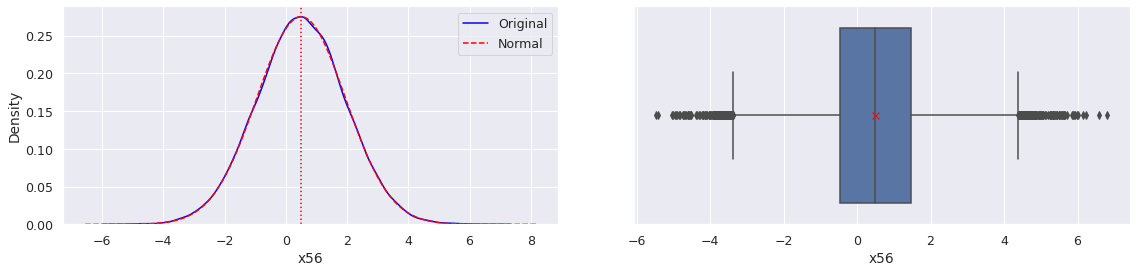

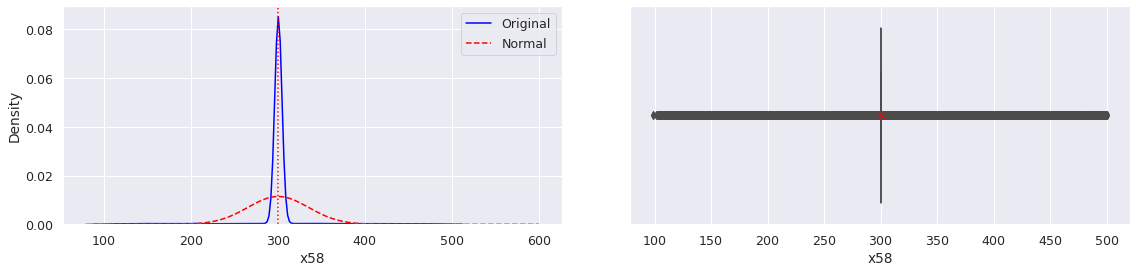

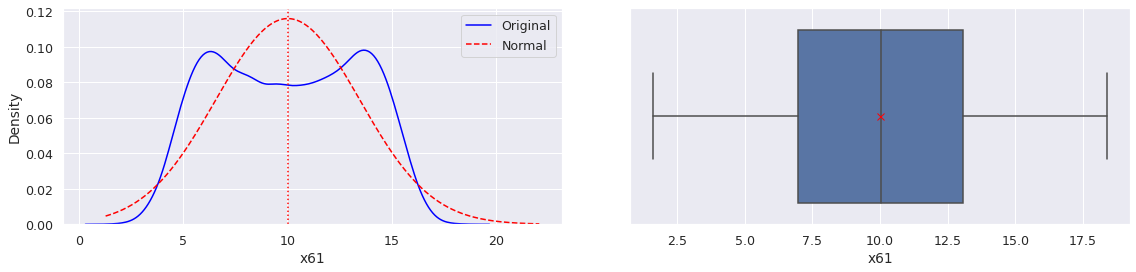

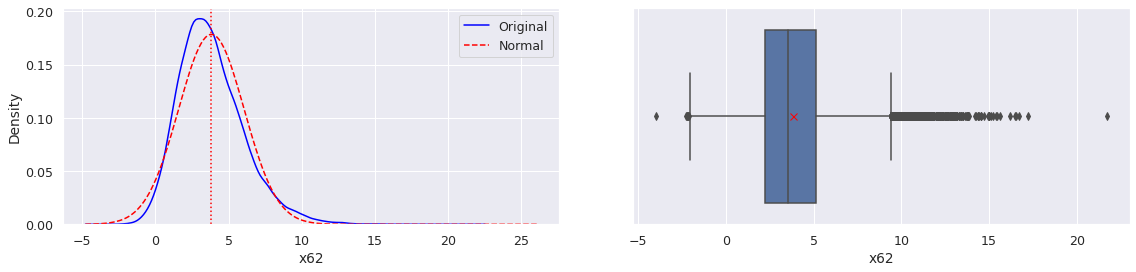

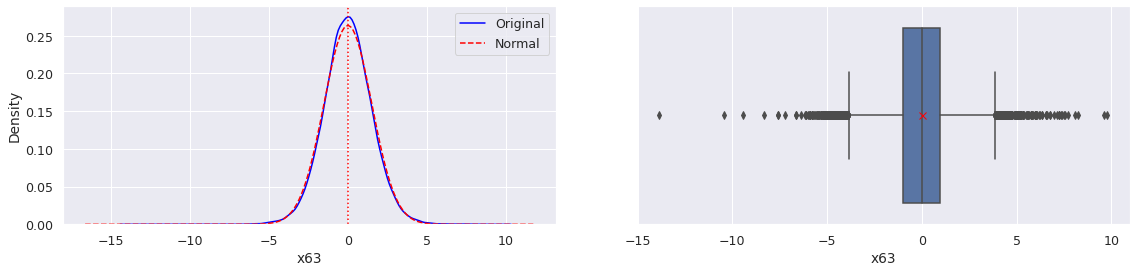

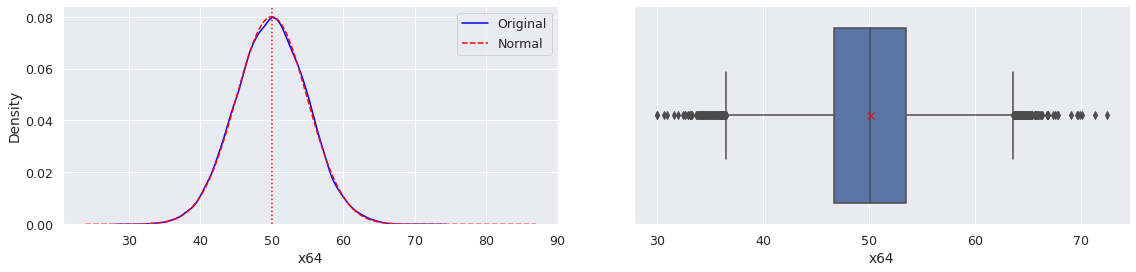

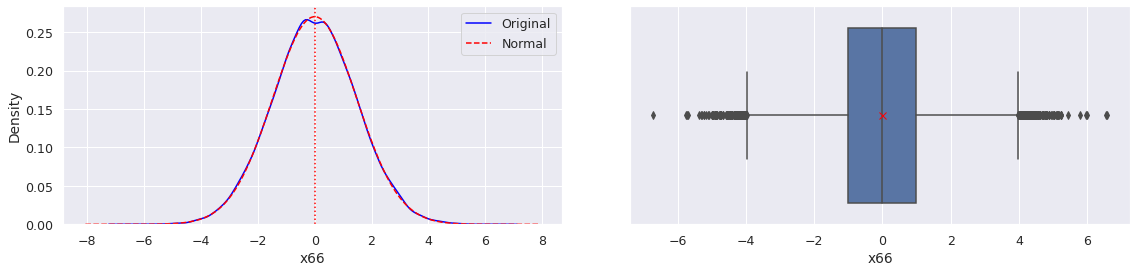

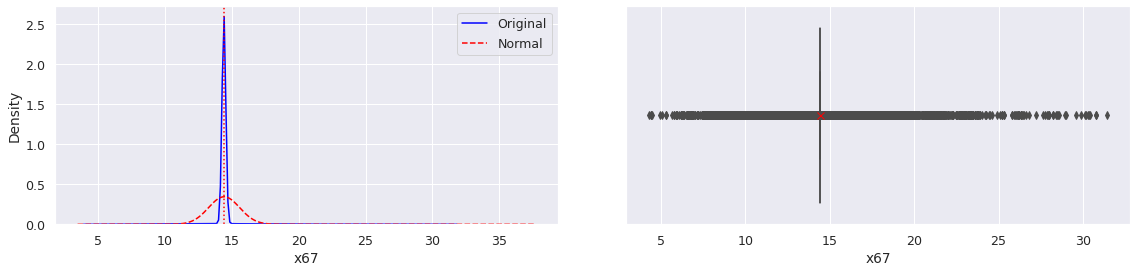

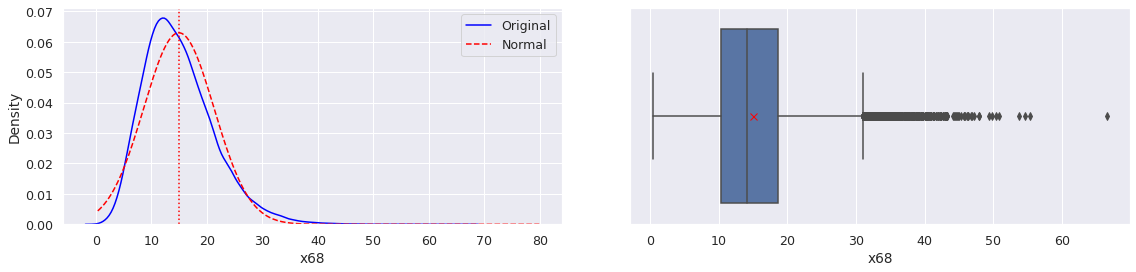

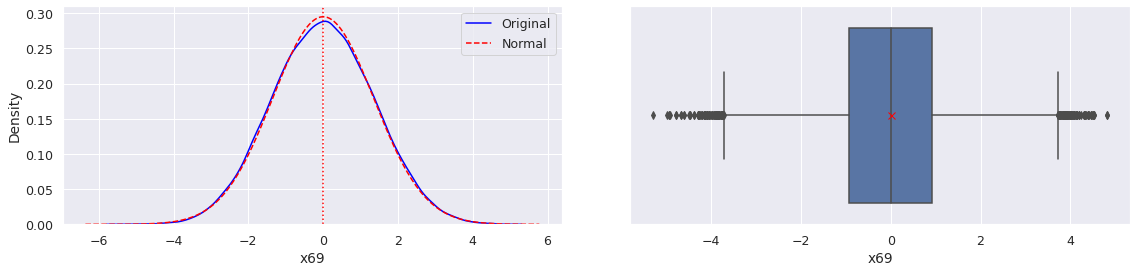

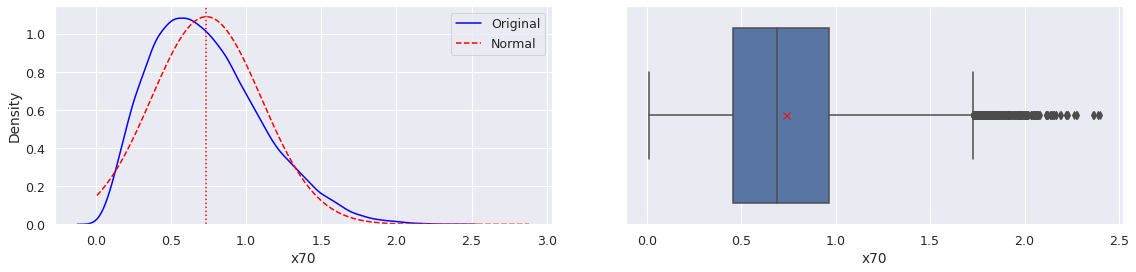

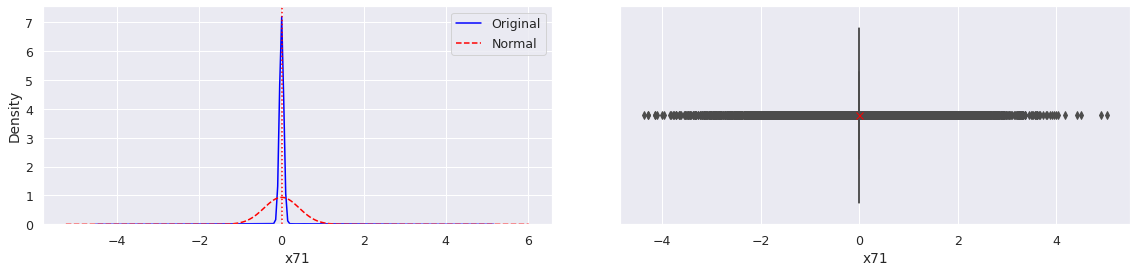

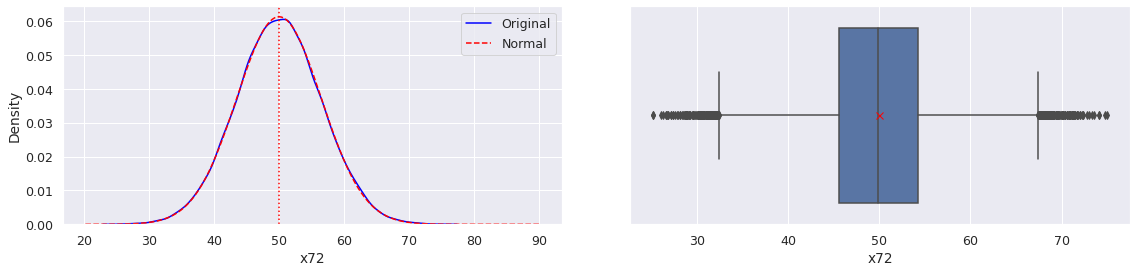

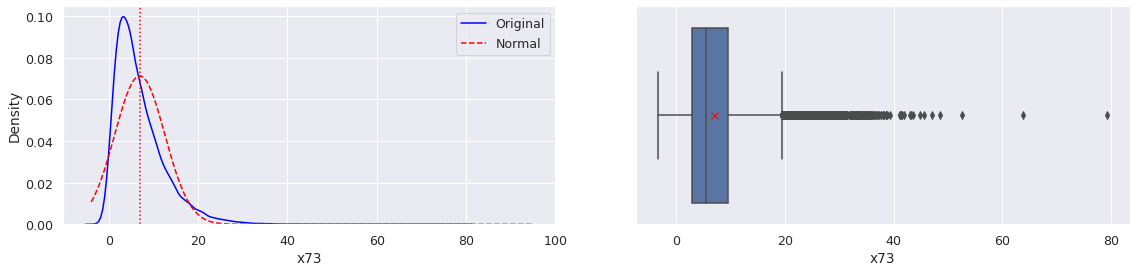

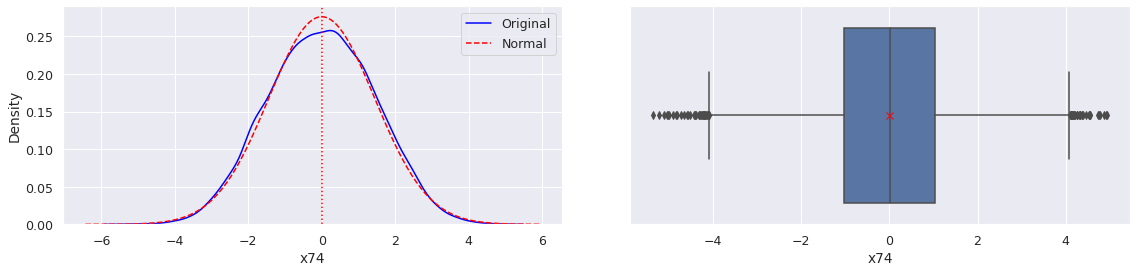

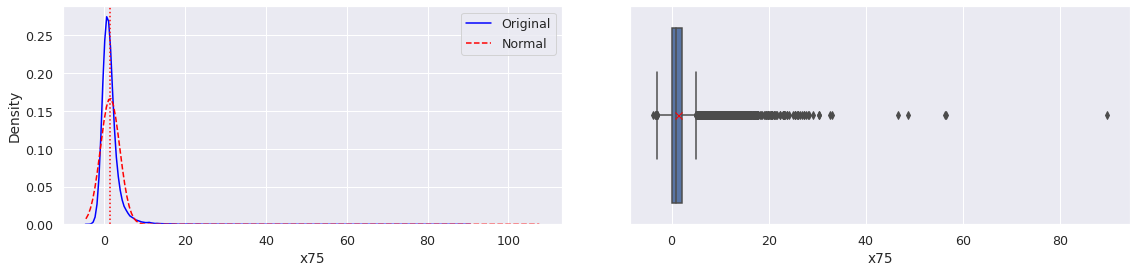

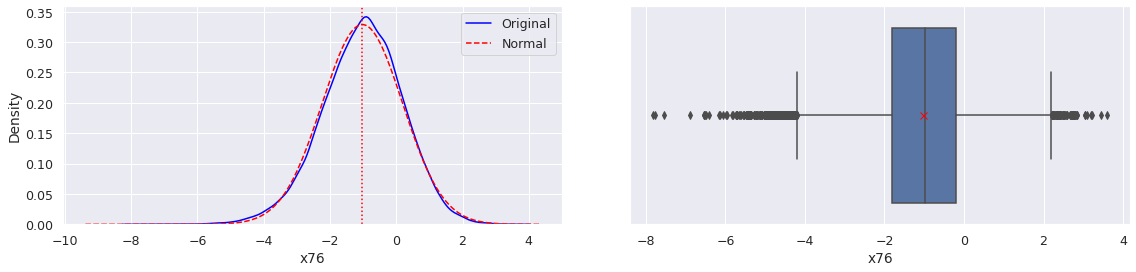

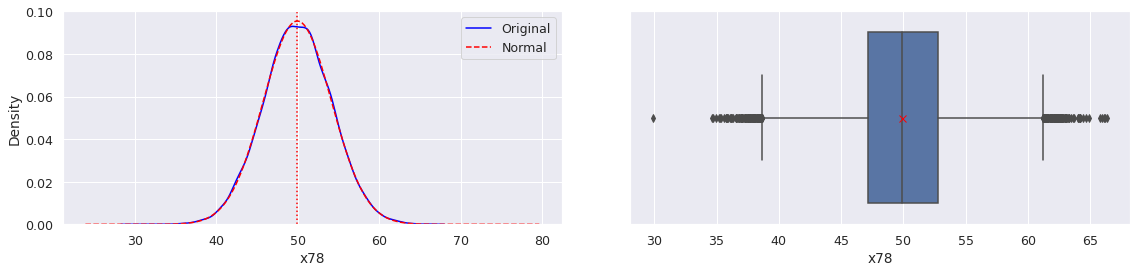

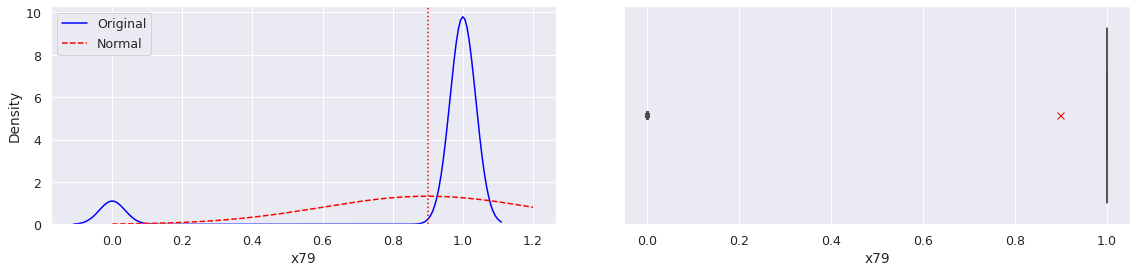

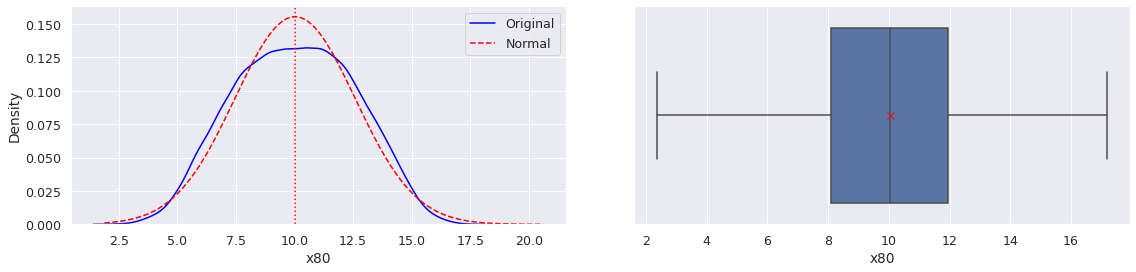

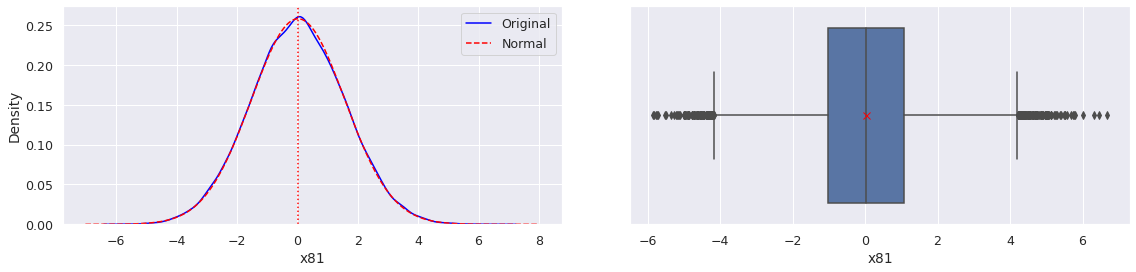

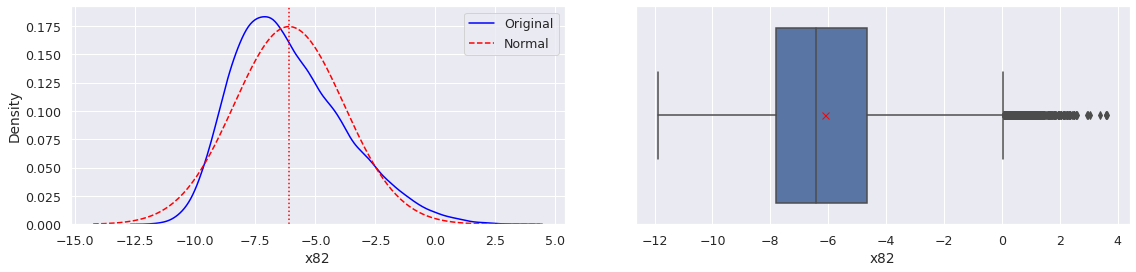

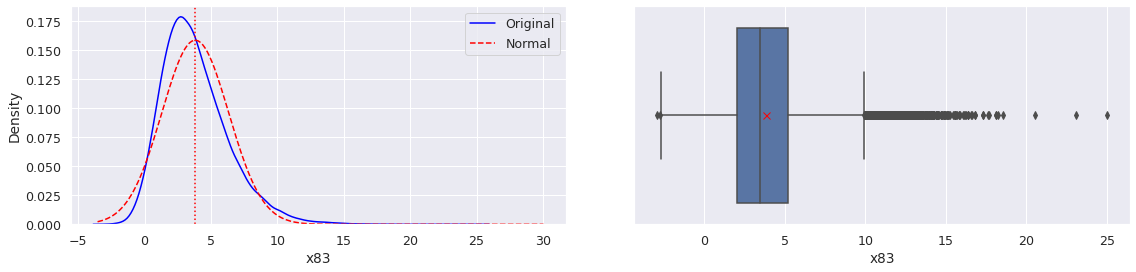

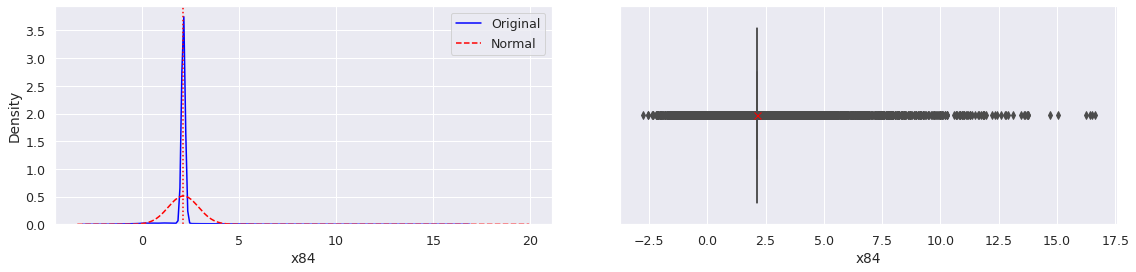

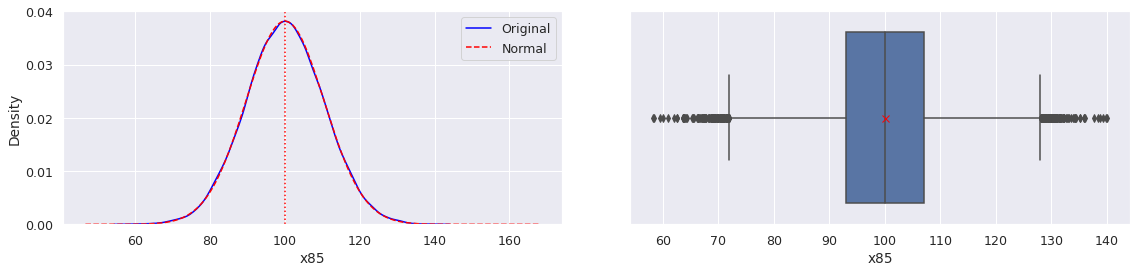

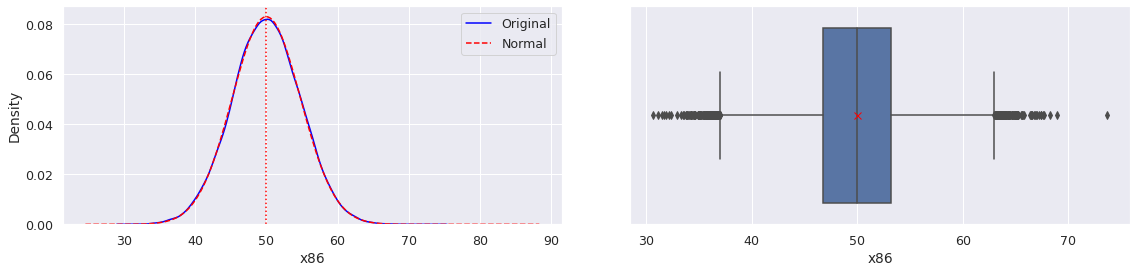

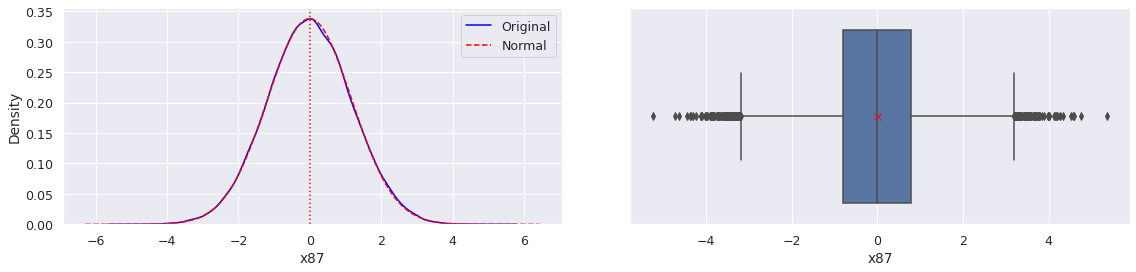

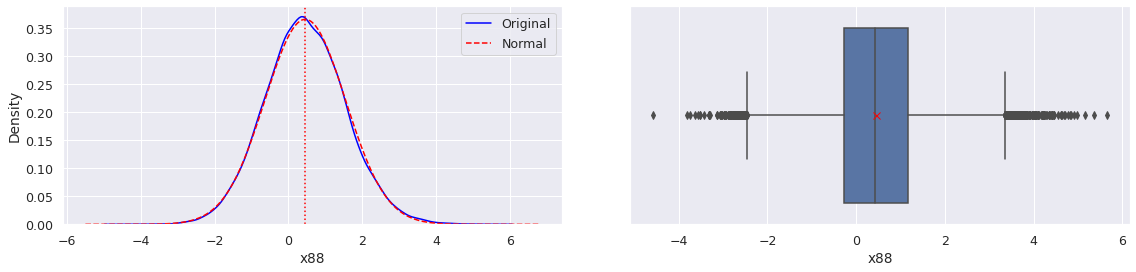

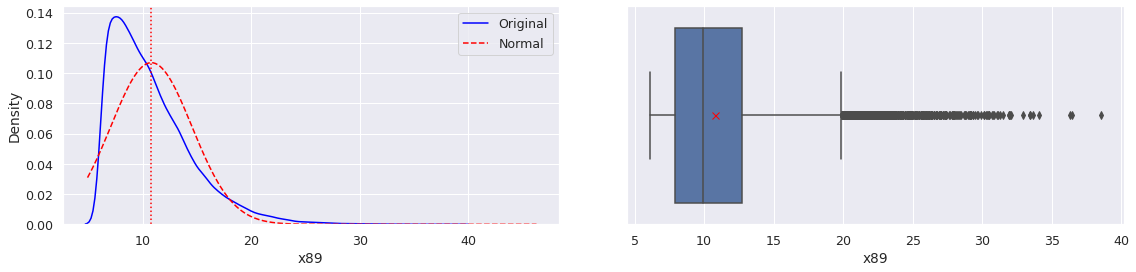

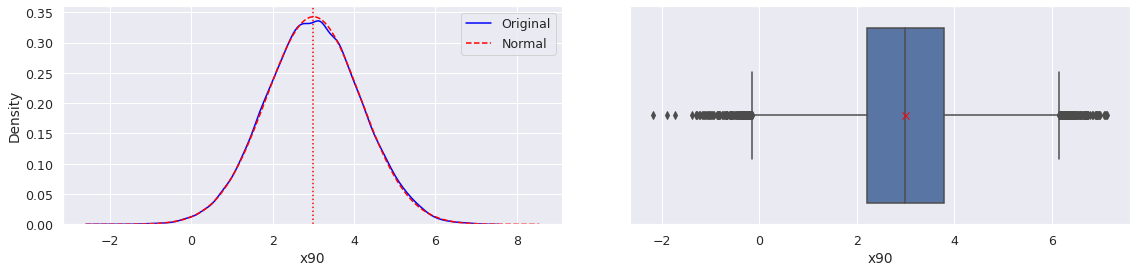

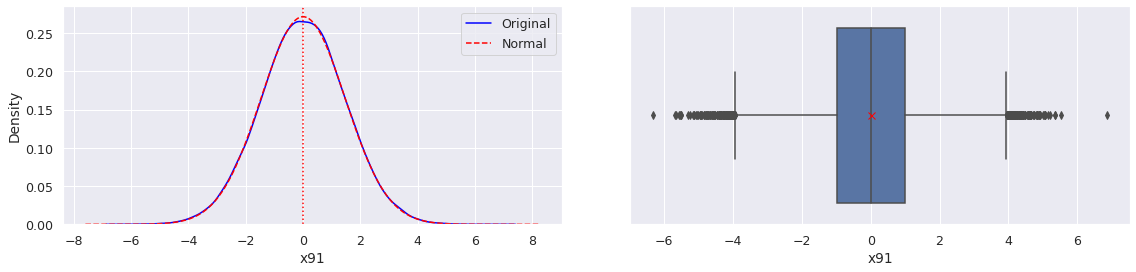

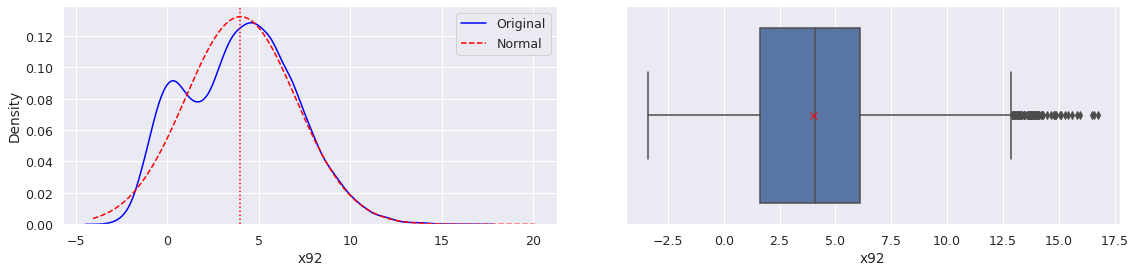

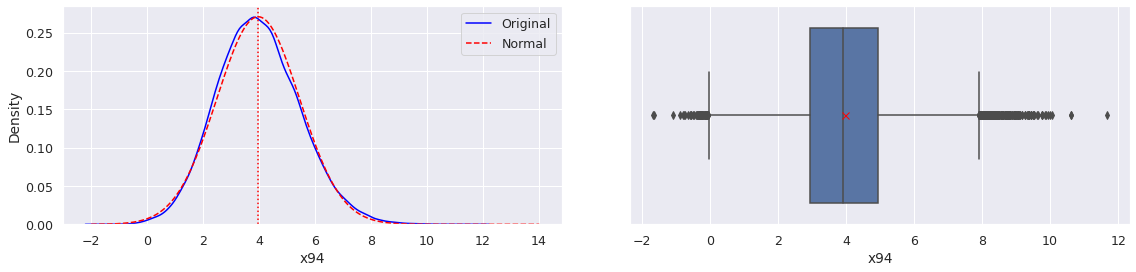

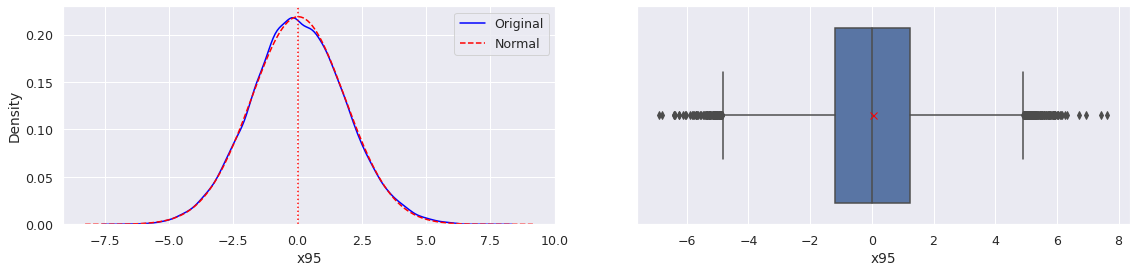

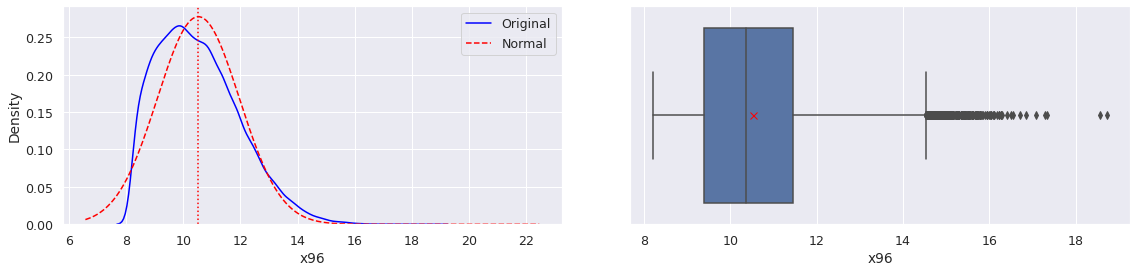

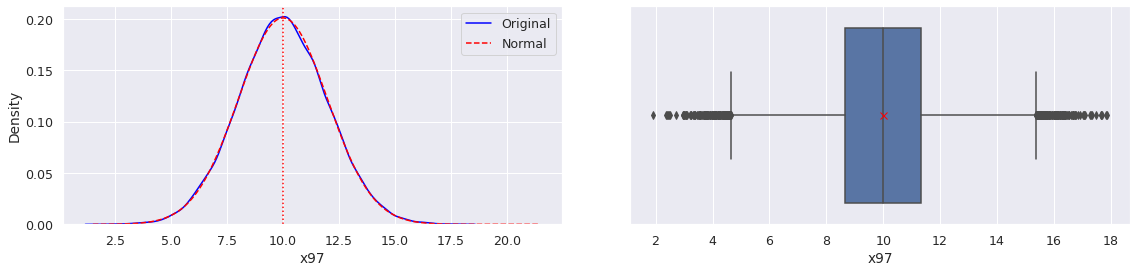

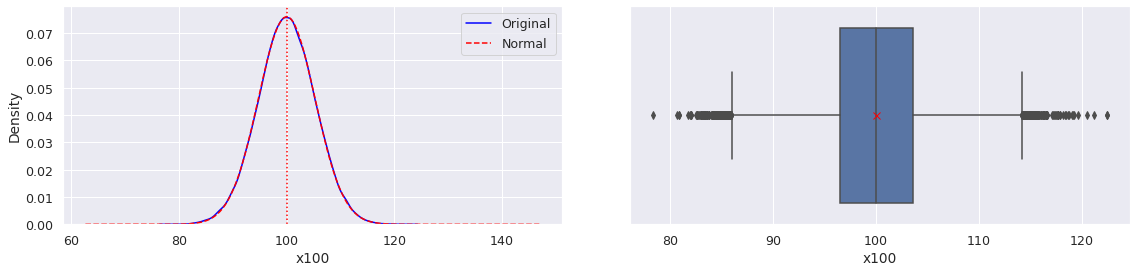

In [22]:
# Doing a loop over all continuous numerical columns to plot their distributions
for col in num_cols:
    # Calculating the equivalent normal distribution (mu and sigma come from training)
    min_scale = df[col].min()
    max_scale = df[col].max()
    if(min_scale >= 0):
      min_scale = min_scale*0.8
    else:  
      min_scale = min_scale*1.2
    if(max_scale >= 0):
      max_scale = max_scale*1.2
    else:  
      max_scale = max_scale*0.8  
    norm_dist_x = np.linspace(min_scale, max_scale, 200)
    norm_dist_y = stats.norm.pdf(norm_dist_x, loc = df[col].mean(), scale = df[col].std(ddof = 1))
    
    plt.figure(figsize = (16, 4));
    # KDE plots
    plt.subplot(121);
    sns.kdeplot(data = df, x = col, color = 'blue');
    plt.plot(norm_dist_x, norm_dist_y, linestyle = '--', color = 'red');
    plt.axvline(df[col].mean(), linestyle = ':', color = 'red');
    plt.legend(['Original', 'Normal']);
    # Boxplots
    plt.subplot(122);
    sns.boxplot(data = df, x = col, showmeans = True, meanprops = 
                {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
    plt.tight_layout(w_pad = 5);

#### Observations:

*   Here, the red vertical lines show the mean values, and the red, dashed distibutions are equivalent, idealized normal distributions with the same $\mu$ and $\sigma$ as the variable.
*   Here, several variables reveal close-to-normal distributions, but some also exhibit distorted or displaced distributions (w.r.t. normal), or distributions fundamentally different from normal (e.g., bimodal like x18, x40 and x61 or skewed like x14, x22 and x89).
*   For most variables, mean and median are fairly close to one another.
*   All variables reveal several outliers on the both sides of the boxplot, but since all these outliers look fairly continuous w.r.t. the rest of the data, and nothing odd about them stands out, I choose not to treat them in anyways, as it would change the underlying statistics of the variables. 
*   As will be seen soon, the distribution plots w.r.t. the target class reveal more useful information for modeling. (E.g., they would tell us which variables are better classifiers.) 
*   x79, although included among numerical variables, takes only three values (nan, 0 or 1), so we ensure that it's converted into a categorical variable.

In [23]:
# Exploring x79
print('Unique values of x79:', list(df.x79.unique()))
df.x79 = df.x79.astype(str)
df.x79.replace(['0.0', '1.0', 'nan'], ['no', 'yes', 'unknown'], inplace = True)
print('Unique values of x79 after modifications:', list(df.x79.unique()))
# Adding x79 to the list of categorical variables
num_cols.remove('x79')
cat_cols.append('x79')
cat_cols = sorted(cat_cols)

Unique values of x79: [1.0, nan, 0.0]
Unique values of x79 after modifications: ['yes', 'unknown', 'no']


### Categorical Variables

**`Target Variable`**

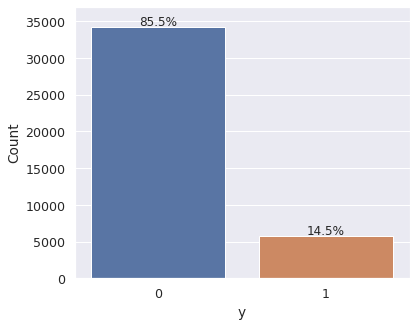

In [24]:
plt.figure(figsize = (6, 5));
cntplt = sns.countplot(data = df, x = 'y', order = [0, 1]);
countplot_labeling(cntplt, df);
plt.ylabel('Count');
plt.ylim(0, 37000);

#### Observations:

As can be seen, the overwhelming majority of the target class is zero. The presence of imbalanced classes thus requires weighting classes or resampling the data to build more accurate classification models.

**`Categorical Variables With Three or Fewer Classes`**

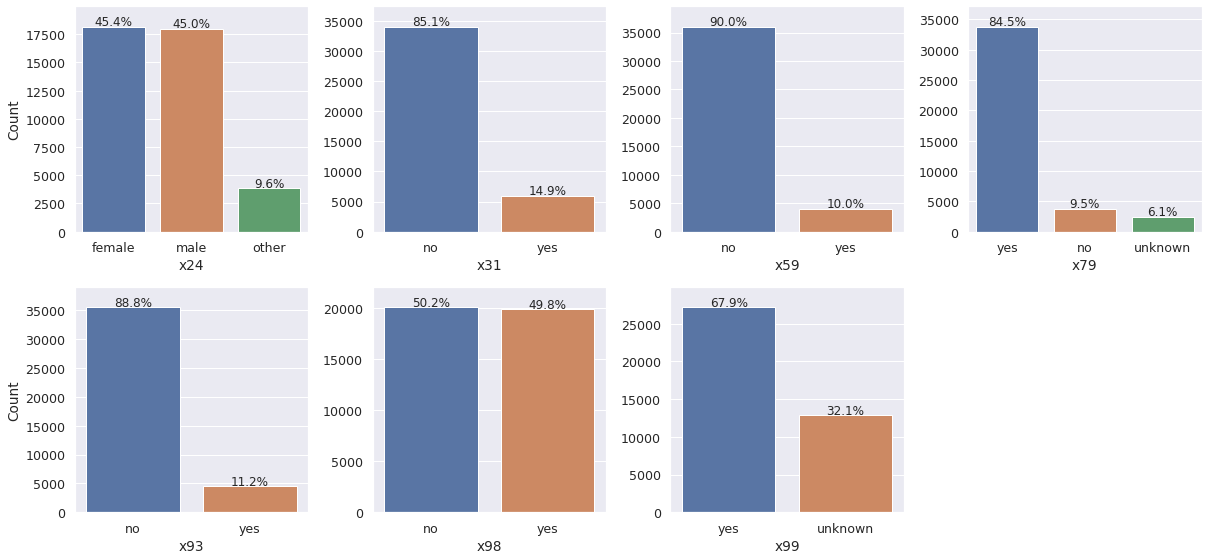

In [25]:
# Looping over categorical variables to plot their countplots
i = 0
plt.figure(figsize = (17, 8));
for col in cat_cols:
    if(df[col].nunique() <= 3):
      i += 1
      plt.subplot(2, 4, i)
      cntplt = sns.countplot(data = df, x = col, order = df[col].value_counts().index);
      countplot_labeling(cntplt, df);
      plt.ylim(0, df[col].value_counts()[0]*1.1)
      if(i % 4 == 1):
        plt.ylabel('Count');
      else:
        plt.ylabel('');  
plt.tight_layout();

#### Observations:

*   Male and female are represented in the data with almost the same proportion. The genders of about 10% of records weren't known or the clients corresponding to those records identify as neither male or female.
*   Countplots w.r.t. the target variable would reveal more important information about the value of each feature as a classifier.  

**`Day of the Week`**

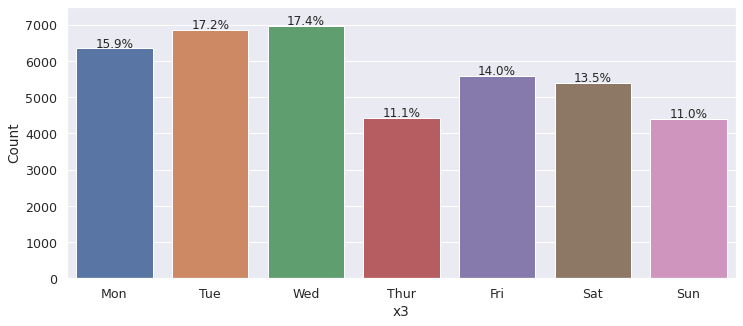

In [26]:
plt.figure(figsize = (12, 5));
cntplt = sns.countplot(data = df, x = 'x3', order = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']);
countplot_labeling(cntplt, df);
plt.ylabel('Count');
plt.ylim(0, 7500);

#### Observations:

The early weekdays are present in the data more frequently than the other days.

**`State`**

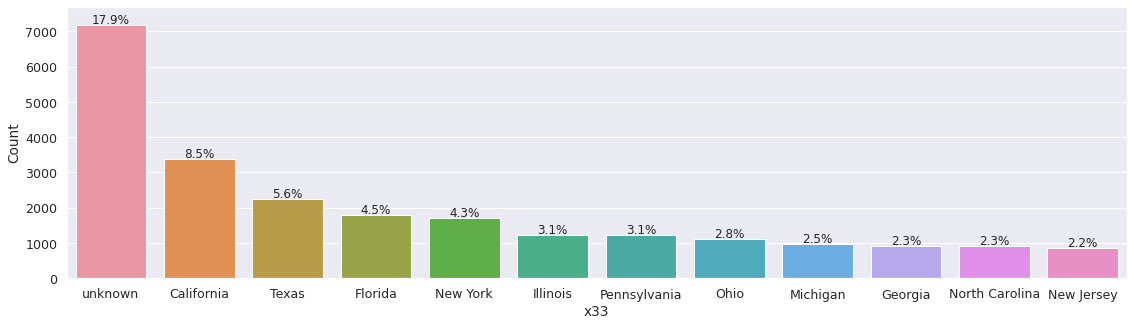

In [27]:
plt.figure(figsize = (19, 5));
cntplt = sns.countplot(data = df, x = 'x33', order = df.x33.value_counts().index[:12]);
countplot_labeling(cntplt, df);
plt.ylabel('Count');
plt.ylim(0, 7700);

#### Observations:

*   For nearly 18% of the records, the state isn't provided, making 'unknown' the most frequent class in x33.
*   Besides that, the states appear in the data more or less proportional to their population.
*   Only Top 12 states have been shown in the figure.

**`Month of the Year`**

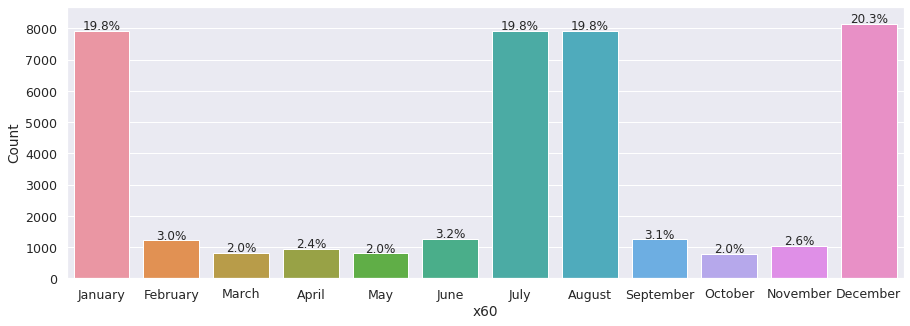

In [28]:
plt.figure(figsize = (15, 5));
cntplt = sns.countplot(data = df, x = 'x60', order = month_name[1:13]);
countplot_labeling(cntplt, df);
plt.ylabel('Count');
plt.ylim(0, 8700);

#### Observations:

There exists records for some months (January, July, August and December) far more than the other months.

**`Insurance`**

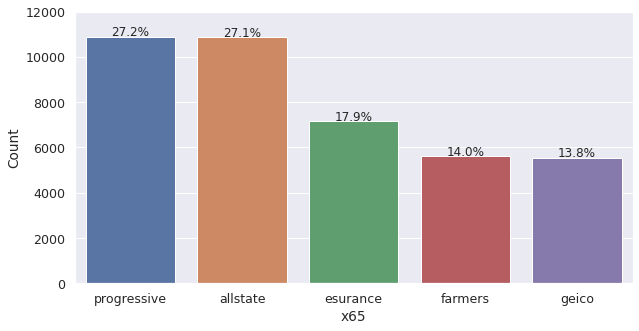

In [29]:
plt.figure(figsize = (10, 5));
cntplt = sns.countplot(data = df, x = 'x65', order = df.x65.value_counts().index);
countplot_labeling(cntplt, df);
plt.ylabel('Count');
plt.ylim(0, 12000);

#### Observations:

The top insurers in the data are *Progressive* and *Allstate*, respectively.

**`Vehicle Type`**

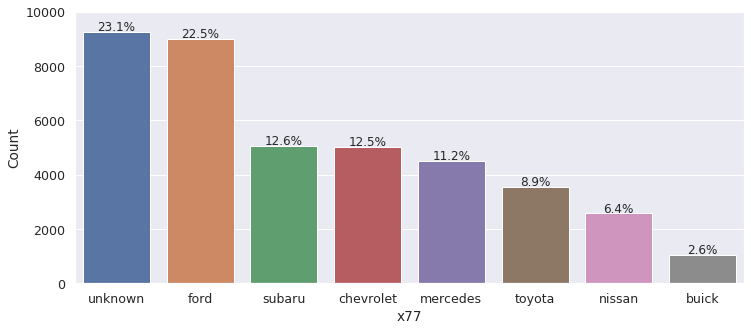

In [30]:
plt.figure(figsize = (12, 5));
cntplt = sns.countplot(data = df, x = 'x77', order = df.x77.value_counts().index);
countplot_labeling(cntplt, df);
plt.ylabel('Count');
plt.ylim(0, 10000);

#### Observations:

*   The vehicle type for more than 23% of records isn't provided, making 'unknown' the most repeated class for x77.
*   After 'unknown', *Ford* is the most frequent vehicle type.

## EDA: Bivariate Analysis

### Numerical Variables

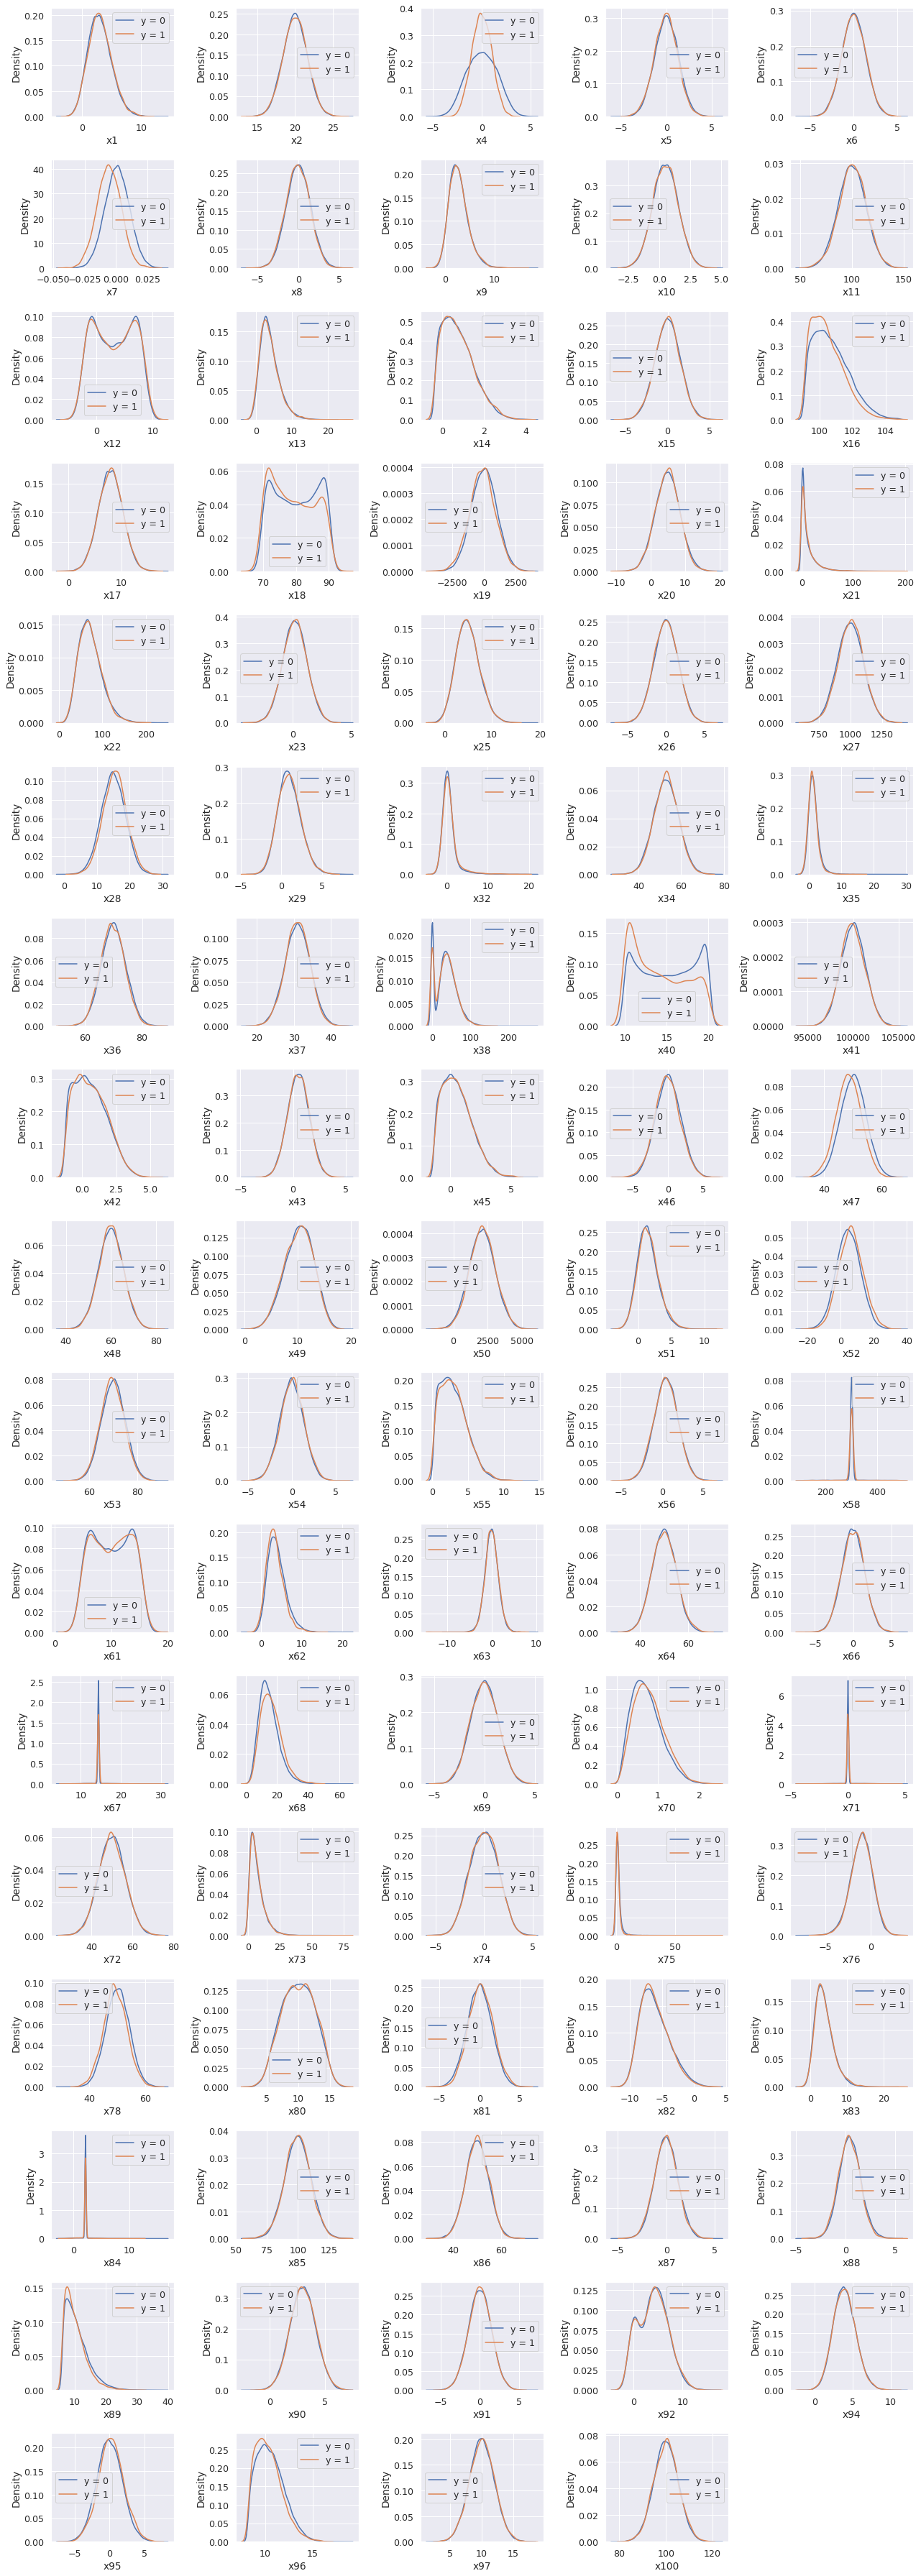

In [31]:
# Demonstrating KDE plots of numerical variables w.r.t. y
plt.figure(figsize = (18, 50));
for i, col in enumerate(num_cols):
    plt.subplot(17, 5, i+1);
    sns.kdeplot(data = df[df.y == 0], x = col); 
    sns.kdeplot(data = df[df.y == 1], x = col);
    plt.legend(['y = 0', 'y = 1']); 
plt.tight_layout();

In [32]:
# Making a list of all numerical variables useful for differentiating between target classes
useful_num_features = ['x4', 'x7', 'x16', 'x18', 'x40', 'x47', 'x52', 'x68', 'x70', 'x78']

#### Observations:

*   Here, numerical features have been deemed useful, if they could be effectively leveraged for separation of the target classes, i.e., whether the distributions of the feature w.r.t. the target classes look different enough from each other or not. 
*   Some of the currently included useful variables should've been disregarded with a more strict approach, but I chose to be as generous as possible, and count even the slightest amount of difference in the distributions.

**`Correlation Among Numerical Variables`**

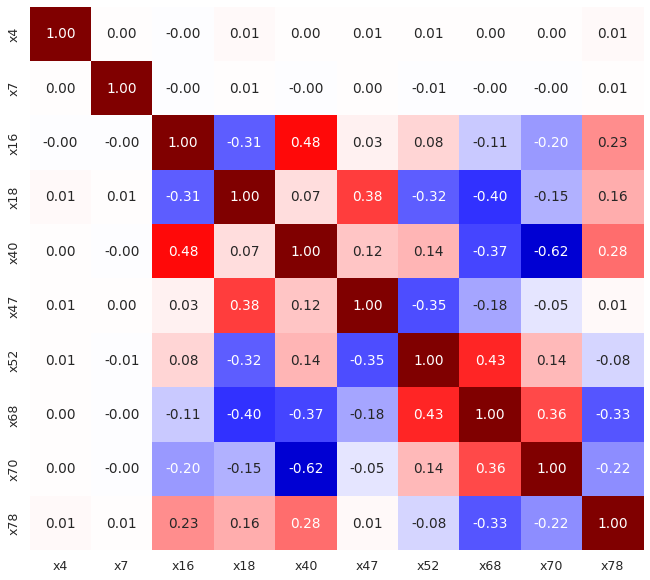

In [33]:
df_temp = df[useful_num_features].copy()
plt.figure(figsize = (11, 10));
sns.heatmap(df_temp.corr(), annot = True, vmin = -1, vmax = 1, cbar = False, cmap = 'seismic', fmt = '.2f');

In [34]:
# VIFs of numerical variables that will be retained for modeling
VIF_df = pd.DataFrame(columns = ['Feature', 'VIF'])
print('VIFs of numerical modeling features:')
for i, col in enumerate(df_temp.columns.tolist()):
    VIF_df.loc[i, 'Feature'] = col
    VIF_df.loc[i, 'VIF'] = variance_inflation_factor(df_temp.dropna().values, i)
VIF_df.sort_values(by = 'VIF', ascending = False)    

VIFs of numerical modeling features:


Feature     VIF
2     x16 498.794
3     x18 218.164
9     x78 188.407
5     x47 184.256
4     x40  69.768
7     x68  11.812
8     x70   9.095
6     x52   2.715
0      x4   1.001
1      x7   1.001

In [35]:
# Iterating over numerical variables to find out how many of them should be
# dropped to get rid of multicollinearity
VIF_df.sort_values(by = 'VIF', ascending = False, inplace = True)   
VIF_df.reset_index(inplace = True, drop = True)
while VIF_df['VIF'].max() > 10:
    VIF_df.drop(0, axis = 0, inplace = True)
    VIF_df_new = pd.DataFrame(columns = ['Feature', 'VIF'])
    for i, col in enumerate(VIF_df.Feature):
      VIF_df_new.loc[i, 'Feature'] = col
      VIF_df_new.loc[i, 'VIF'] = variance_inflation_factor(df_temp[VIF_df.Feature.tolist()].dropna().values, i) 
    VIF_df = VIF_df_new.copy()
    VIF_df.sort_values(by = 'VIF', ascending = False, inplace = True)   
    VIF_df.reset_index(inplace = True, drop = True)
display(VIF_df)   

Feature   VIF
0     x68 7.569
1     x70 4.891
2     x40 4.273
3     x52 1.782
4      x4 1.000
5      x7 1.000

In [36]:
# Listing highly correlated numerical variabes among modeling features
high_corr_num_vars = ['x16', 'x18', 'x40', 'x47', 'x68', 'x70', 'x78']

#### Observations:

*   With the exceptions of x4, x7, and somewhat x52, most of the useful numerical variables reveal high correlations with one another, and, as a result, their VIFs become fairly large. These should be taken care of before building the logistic regression model, as this model is linear, and the presence of multicollinearity can significantly undermine its performance.
*   Above, we've adopted an algorithm that iterates over numerical variables and drops the one with the highest VIF, and recalculates VIFs, until we have gotten rid off all variables with VIF > 10. This algorithm shows that, in addition to x4, x7 and x52, we only end up with three variables, implying that 3 is an appropriate value for the number of latent variables, while using factor analysis to extract uncorrelated variables from the present highly correlated variables. 
*   The threshold of high VIF was taken as 10, as it corresponds to explaining 90% of the variance in a certain feature by other existing features. 


### Categorical Variables

**`Categorical Variables With Three or Fewer Classes`**

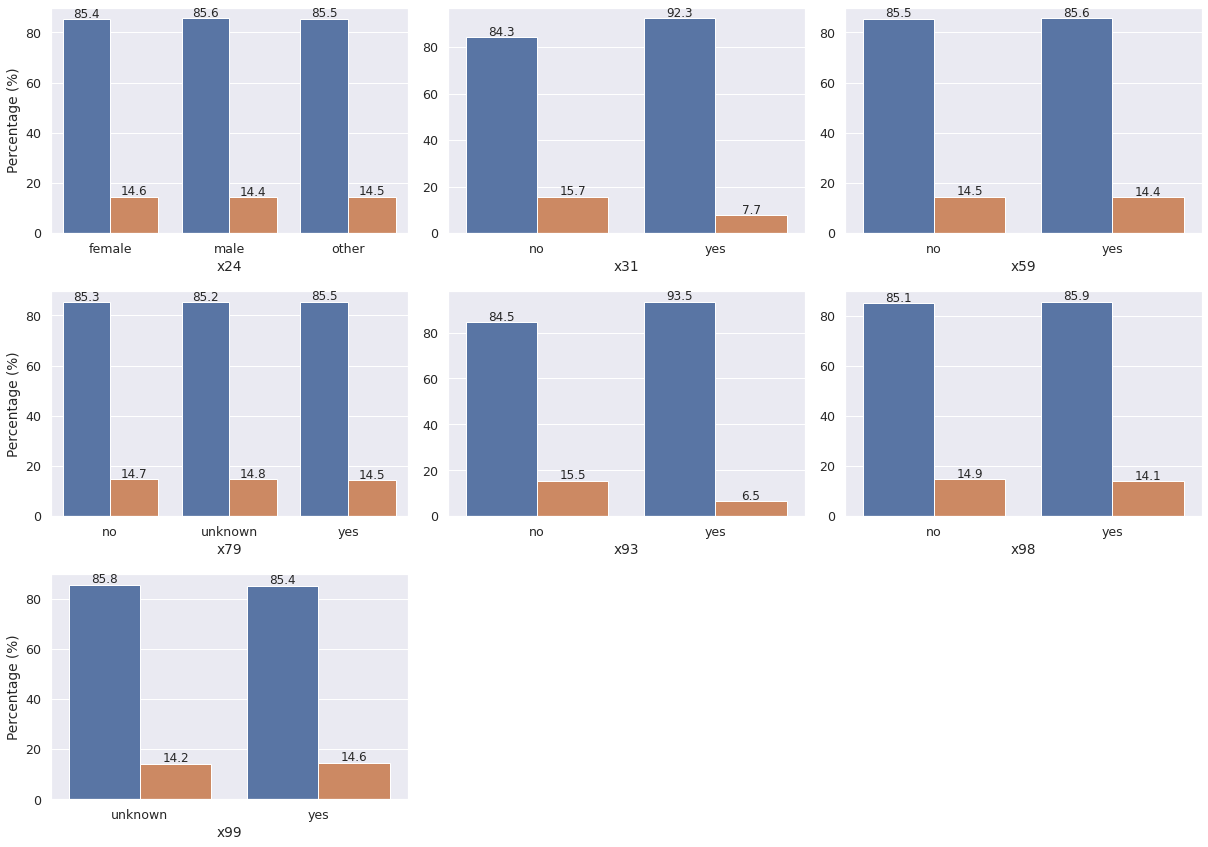

In [37]:
# Plotting the frequency distribution of categorical variables w.r.t. y 
# (only for those with a few categories)

plt.figure(figsize = (17, 12));
i = 0
for col in cat_cols:
    if(df[col].nunique() > 3):
        continue  
    else:
      i+=1  

    # Building a crosstab of job experience and case status
    ctab = pd.crosstab(df[col], df['y'], normalize = 'index')
    # Converting crosstab into a dataframe
    ctab_df = ctab.stack().reset_index()
    ctab_df.rename(columns = {0: 'value'}, inplace = True)
    # Converting fractions into percentages
    ctab_df['value'] = ctab_df['value']*100

    # Plotting crosstab in percentage form
    plt.subplot(3, 3, i);
    barplt = sns.barplot(data = ctab_df, x = col, y = 'value', hue = 'y');
    countplot_labeling(barplt, ctab_df, perc = False);
    plt.legend(title = 'y').set_visible(False);
    plt.xlabel(col);
    if(i%3 == 1):
      plt.ylabel('Percentage (%)');
    else:
      plt.ylabel('');
plt.tight_layout();

#### Observations:

Among categorical features with three or fewer classes, only x31 and x93 (and slightly x98) appear to be useful in distinguishing between the target classes. For the rest, the frequency distribution w.r.t. the target classes don't seem to be meaningfully different.


**`Day of the Week`**

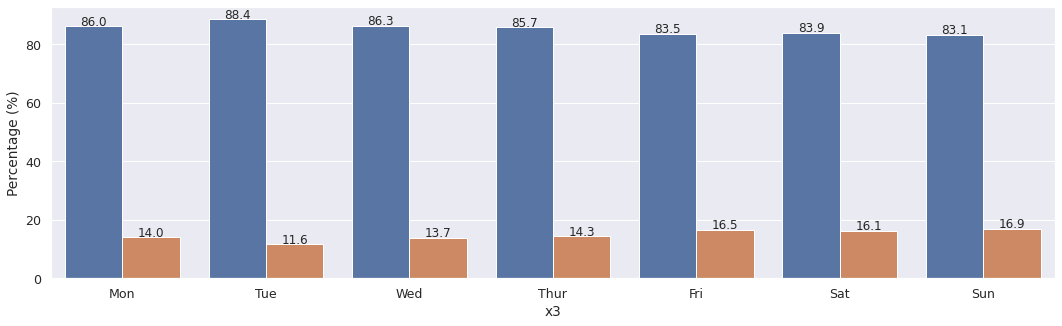

In [38]:
# Building a crosstab of job experience and case status
ctab = pd.crosstab(df['x3'], df['y'], normalize = 'index')
# Converting crosstab into a dataframe
ctab_df = ctab.stack().reset_index()
ctab_df.rename(columns = {0: 'value'}, inplace = True)
# Converting fractions into percentages
ctab_df['value'] = ctab_df['value']*100

# Plotting crosstab in percentage form
plt.figure(figsize = (18, 5));
barplt = sns.barplot(data = ctab_df, x = 'x3', y = 'value', hue = 'y', 
                     order = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']);
countplot_labeling(barplt, ctab_df, perc = False);
plt.legend(title = 'y').set_visible(False);
plt.xlabel('x3');
plt.ylabel('Percentage (%)');

#### Observations:

The fractions of the target classes somewhat vary with the day of the week. 

**`State`**

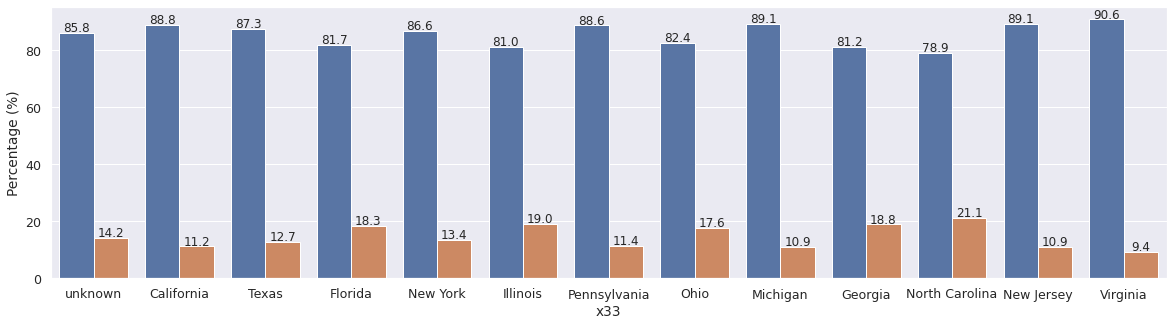

In [39]:
# Most frequent states in the dataset
top_states = df.x33.value_counts().index.tolist()[:13]

# Building a crosstab of job experience and case status
ctab = pd.crosstab(df['x33'], df['y'], normalize = 'index')
# Converting crosstab into a dataframe
ctab_df = ctab.stack().reset_index()
ctab_df.rename(columns = {0: 'value'}, inplace = True)
# Converting fractions into percentages
ctab_df['value'] = ctab_df['value']*100

# Plotting crosstab in percentage form
plt.figure(figsize = (20, 5));
barplt = sns.barplot(data = ctab_df, x = 'x33', y = 'value', hue = 'y', order = top_states);
countplot_labeling(barplt, ctab_df, perc = False);
plt.legend(title = 'y').set_visible(False);
plt.xlabel('x33');
plt.ylabel('Percentage (%)');

#### Observations:

*   The fractions of the target classes appear to be highly dependent on the state.
*   Note that, here, only top 13 classes in x33 have been shown.

**`Month of the Year`**

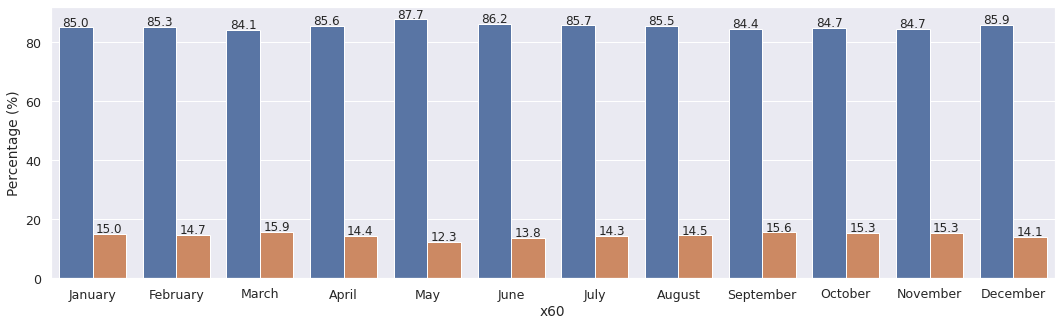

In [40]:
# Building a crosstab of job experience and case status
ctab = pd.crosstab(df['x60'], df['y'], normalize = 'index')
# Converting crosstab into a dataframe
ctab_df = ctab.stack().reset_index()
ctab_df.rename(columns = {0: 'value'}, inplace = True)
# Converting fractions into percentages
ctab_df['value'] = ctab_df['value']*100

# Plotting crosstab in percentage form
plt.figure(figsize = (18, 5));
barplt = sns.barplot(data = ctab_df, x = 'x60', y = 'value', hue = 'y', order = month_name[1:13]);
countplot_labeling(barplt, ctab_df, perc = False);
plt.legend(title = 'y').set_visible(False);
plt.xlabel('x60');
plt.ylabel('Percentage (%)');

#### Observations:

The frequency distribution of the target variable also, up to some degree, is a function of month.

**`Insurance`**

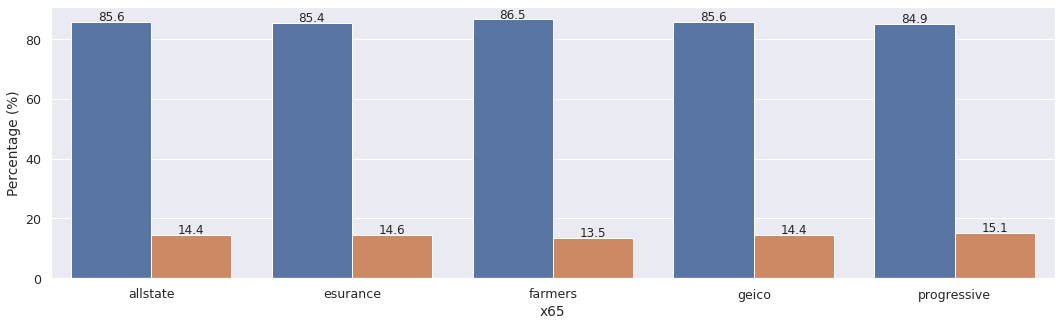

In [41]:
# Building a crosstab of job experience and case status
ctab = pd.crosstab(df['x65'], df['y'], normalize = 'index')
# Converting crosstab into a dataframe
ctab_df = ctab.stack().reset_index()
ctab_df.rename(columns = {0: 'value'}, inplace = True)
# Converting fractions into percentages
ctab_df['value'] = ctab_df['value']*100

# Plotting crosstab in percentage form
plt.figure(figsize = (18, 5));
barplt = sns.barplot(data = ctab_df, x = 'x65', y = 'value', hue = 'y');
countplot_labeling(barplt, ctab_df, perc = False);
plt.legend(title = 'y').set_visible(False);
plt.xlabel('x65');
plt.ylabel('Percentage (%)');

**`Vehicle Type`**

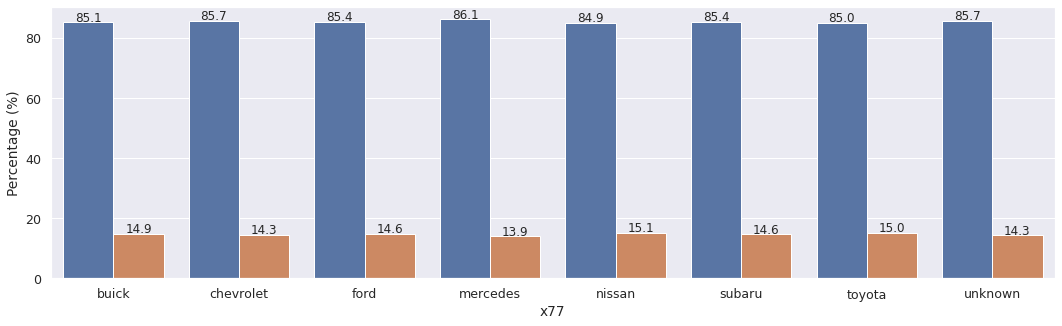

In [42]:
# Building a crosstab of job experience and case status
ctab = pd.crosstab(df['x77'], df['y'], normalize = 'index')
# Converting crosstab into a dataframe
ctab_df = ctab.stack().reset_index()
ctab_df.rename(columns = {0: 'value'}, inplace = True)
# Converting fractions into percentages
ctab_df['value'] = ctab_df['value']*100

# Plotting crosstab in percentage form
plt.figure(figsize = (18, 5));
barplt = sns.barplot(data = ctab_df, x = 'x77', y = 'value', hue = 'y');
countplot_labeling(barplt, ctab_df, perc = False);
plt.legend(title = 'y').set_visible(False);
plt.xlabel('x77');
plt.ylabel('Percentage (%)');

#### Observations:

The insurer and vehicle type also appear to be slightly helpful in separating the target classes.

In [43]:
# Making a list of all categorical variables useful for differentiating between target classes
useful_cat_features = ['x3', 'x31', 'x33', 'x60', 'x65', 'x77', 'x93', 'x98']
# List of all variables useful for classification model
modeling_features = useful_num_features + useful_cat_features

## Data Preparation for Modeling 

In [44]:
# Retaining only the useful variables for modeling
df_model = df[modeling_features].copy()
df_model['y'] = df['y']
# Converting categorical variables with some sort of order into numerical ones
df_model.x3.replace(['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'], np.arange(1, 8), inplace = True)
df_model.x60.replace(month_name[1:13], np.arange(1, 13), inplace = True)

# Splitting data into target and independent variables as well as training and validation sets
X = df_model.drop(columns = 'y')
y = df_model['y']
X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle = True, train_size = 0.75, 
                                                  stratify = y, random_state = 1)

# Resetting the index of training and validation sets
X_train.reset_index(inplace = True, drop = True)
X_val.reset_index(inplace = True, drop = True)
y_train.reset_index(inplace = True, drop = True)
y_val.reset_index(inplace = True, drop = True)

#### Notes:

*   Here, only features deemed useful in previous section have been retained for modeling Note that many more features, or perhaps, even all of them, could be retained. These were all attempted while beuilding the classifiers (although not show for the sake of brevity), but they all resulted in highly overfit models that capture a lot of noise, instead of real information.
*   I chose to convert categorical features with natural order into numerical ones to reduce the no. of variables during modeling, and to render models more interpretable. I remark that both weekdays and months are circular, and this may cause some issues, but my attempts showed that this leads to the best-performing models, compared to other alternatives (e.g., one-hot encoding).

In [45]:
# Ensuring target classes are present with the same proportions in all datasets
print('Fraction of target classes in original dataset:\n', y.value_counts(1), sep = '')
print('\nFraction of target classes in training set:\n', y_train.value_counts(1), sep = '')
print('\nFraction of target classes in validation dataset:\n', y_val.value_counts(1), sep = '')

Fraction of target classes in original dataset:
0   0.855
1   0.145
Name: y, dtype: float64

Fraction of target classes in training set:
0   0.855
1   0.145
Name: y, dtype: float64

Fraction of target classes in validation dataset:
0   0.855
1   0.145
Name: y, dtype: float64


#### Notes:

I ensured that target classes are represented with the same proportion in both training and validation sets, making the application of the models to unseen data more reliable. 

### Missing Value Treatment

In [46]:
# Lising all columns used for imputation
num_cols = X.select_dtypes(include = np.number).columns.tolist()
str_impute_cols = ['x31', 'x93', 'x98']
impute_cols = num_cols + str_impute_cols

# Finding all columns with missing values in model datasets
cols_with_missing_values = []
for col in X.columns.tolist():
    if(df[col].isnull().sum()):
      cols_with_missing_values.append(col)
print('No. of features with missing values:', len(cols_with_missing_values))

No. of features with missing values: 4


In [47]:
# Making a copy training and validation sets that will be used for imputation
X_train_impute = X_train[impute_cols].copy()
X_val_impute = X_val[impute_cols].copy()

#### Notes:

Here, I ensured only categorical variables with two classes are included for missing value treatment, as giving numbers to those with more than two classes would be tricky.  

In [48]:
# Converting categorical variables included for imputation into numerical ones
X_train_impute.x31 = X_train_impute.x31.replace(['no', 'yes'], [0, 1])
X_train_impute.x93 = X_train_impute.x93.replace(['no', 'yes'], [0, 1])
X_train_impute.x98 = X_train_impute.x98.replace(['no', 'yes'], [0, 1])
X_val_impute.x31 = X_val_impute.x31.replace(['no', 'yes'], [0, 1])
X_val_impute.x93 = X_val_impute.x93.replace(['no', 'yes'], [0, 1])
X_val_impute.x98 = X_val_impute.x98.replace(['no', 'yes'], [0, 1])


# Ensuring all columns in imputation dataframes are of float type
for col in X_train_impute.select_dtypes(include = int).columns.tolist():
    X_train_impute[col] = X_train_impute[col].astype(float)    
    X_val_impute[col] = X_val_impute[col].astype(float)

#### Notes:

I ensured all variables included for missing value treatment have been rendered numerical, as it's essential for the proper implementation of the imputer.

In [49]:
# Scaling the data before distance-based imputation
preimpute_scaler = MinMaxScaler()
X_train_impute = pd.DataFrame(preimpute_scaler.fit_transform(X_train_impute), 
                              columns = X_train_impute.columns.tolist())
X_val_impute = pd.DataFrame(preimpute_scaler.transform(X_val_impute),
                            columns = X_val_impute.columns.tolist())

# Imputing training and validation sets separately
imputer = KNNImputer(n_neighbors = 5, weights = 'distance')
X_train_impute = pd.DataFrame(imputer.fit_transform(X_train_impute), 
                              columns = X_train_impute.columns.tolist())
X_val_impute = pd.DataFrame(imputer.transform(X_val_impute), 
                            columns = X_val_impute.columns.tolist())

#### Notes:

*   Here, a KNN-based imputer was employed, since compared to alternatives such as standard median-based imputer, it would change distributions less substantially and more smoothly. Note that, replacing all missing values by median or (mean) could create large peaks in distributions and narrows them significantly, as some features have a notable fractions of their values missing.
*   Since a distance-based imputer has been used for missing value treatment, appropriate scaling of all features before implementation of the imputer was essential.

In [50]:
# Transforming imputation datasets to their pre-scaled values
X_train_impute = pd.DataFrame(preimpute_scaler.inverse_transform(X_train_impute),
                              columns = X_train_impute.columns.tolist())
X_val_impute = pd.DataFrame(preimpute_scaler.inverse_transform(X_val_impute),
                            columns = X_val_impute.columns.tolist())

# Filling out missing values in original train/validation sets with those found for imputation datasets
for col in cols_with_missing_values:
    X_train[col] = X_train_impute[col]
    X_val[col] = X_val_impute[col]

In [51]:
# Missing values after imputation
print('No. of missing values in the training set after imputation:', X_train.isnull().sum().sum())
print('No. of missing values in the validation set after imputation:', X_val.isnull().sum().sum())

No. of missing values in the training set after imputation: 0
No. of missing values in the validation set after imputation: 0


#### Observations:

*   Missing value treatment of numerical features done successfullly!
*   Needless to say, for avoiding data leakage, imputation (and all other alterations requiring information from different rows and/or columns) were carried out after data split.

**`Post-Imputation EDA`**

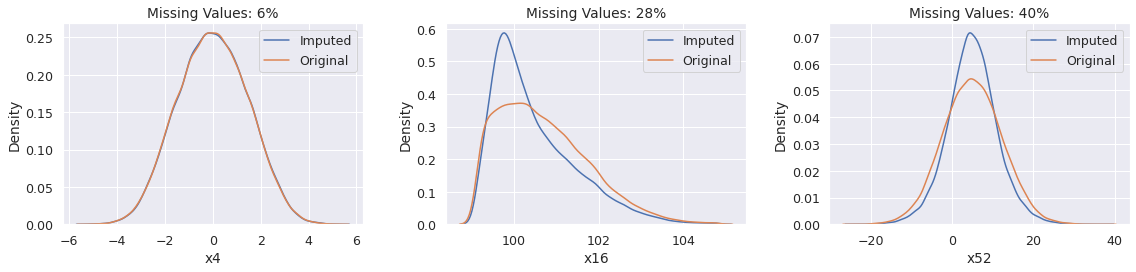

In [52]:
# Plotting the distribution of three variables with different fractions of
# missing values before and after imputation
plt.figure(figsize = (16, 4));
plt.subplot(131);
sns.kdeplot(data = X_train, x = 'x4');
sns.kdeplot(data = X, x = 'x4');
plt.legend(['Imputed', 'Original']);
plt.title('Missing Values: 6%');
plt.subplot(132);
sns.kdeplot(data = X_train, x = 'x16');
sns.kdeplot(data = X, x = 'x16');
plt.legend(['Imputed', 'Original']);
plt.title('Missing Values: 28%');
plt.subplot(133);
sns.kdeplot(data = X_train, x = 'x52');
sns.kdeplot(data = X, x = 'x52');
plt.legend(['Imputed', 'Original']);
plt.title('Missing Values: 40%');
plt.tight_layout(w_pad = 2);

#### Observations:

*   As can be see, the post-imputation changes to the distribution of as certain variable becomes larger with the increase in the fraction of its missing values, suggesting that elimination of features with 80% or more missing values was fully justified, as imputing them could change their nature fundamentally.
*  We also note that the present imputation scheme has preserved the distibutions fairly well.

### Feature Engineering

In [53]:
# Feature enginerring scheme
fa_scheme = FactorAnalysis(n_components = 3)

# Adding engineered features to the datasets
X_train[['eng1', 'eng2', 'eng3']] = fa_scheme.fit_transform(X_train[high_corr_num_vars])
X_val[['eng1', 'eng2', 'eng3']] = fa_scheme.transform(X_val[high_corr_num_vars])

# Dropping highly correlated original features
X_train.drop(columns = high_corr_num_vars, inplace = True)
X_val.drop(columns = high_corr_num_vars, inplace = True)

#### Notes:

*   Here, the highly correlated numerical variables have been replaced by three latent features extracted out of them using factor analysis. 
*   This step is vital for a linear model like logistic regression, but it can also help a nonlinear classifier such as XGBoost, rendering it more interpretable, and reducing its chance of being overfit.

### Quantification of All Features

In [54]:
# Scaling strategy being used for preparation of modeling data and dimension reduction 
modeling_scaler = StandardScaler()

# One-hot encoding and sacling of training and validation sets
X_train_model = pd.get_dummies(X_train, drop_first = True)
X_val_model = pd.get_dummies(X_val, drop_first = True)

# Listing all one-hot encoded categorical columns
cat_cols = []
for col in X_train_model.columns.tolist():
    if(X_train_model[col].nunique() == 2):
        cat_cols.append(col)

for col in cat_cols:
    # probability of the modality
    mu_train = X_train_model[col].sum()/X_train_model.shape[0]   
    mu_val = X_val_model[col].sum()/X_val_model.shape[0]   
    # Properly weighting the one-hot encoded columns before applying scaling
    X_train_model[col] = X_train_model[col]/np.sqrt(mu_train)
    X_val_model[col] = X_val_model[col]/np.sqrt(mu_val)

# Scaling the training and validation sets
X_train_model = pd.DataFrame(modeling_scaler.fit_transform(X_train_model), 
                             columns = X_train_model.columns.tolist())
X_val_model = pd.DataFrame(modeling_scaler.transform(X_val_model), 
                           columns = X_val_model.columns.tolist())

#### Notes:

*   Here, we quantify all remaining categorical features, using one-hot encoding. Furthermore, since variables are of different units and scales, normalizing them via calculating their z-scores can help the classification models (especially the logistic regression one).
*   Weighting one-hot encoded variables by the square-root of the probability of their modality has been shown to be helpful, when one is given a mixed data. This is often invoked while utilizing FAMD (Factorial Analysis of Mixed Data) for dimension reduction. Here, we don't do any further dimension reduction, so the effect of this weighting is limited, but regardless, can slightly help.  

In [55]:
# Undersampling the training set
undersampling_strategy = RandomUnderSampler(sampling_strategy = 1, random_state = 1)
X_train_us, y_train_us = undersampling_strategy.fit_resample(X_train_model, y_train)

#### Notes:

Here, we address the issue of imbalanced data using undersampling, which I explored to be more effective and yielding better-performing models than when oversampling has been done. The comparison hasn't been shown for the sake of brevity.

## Building the Classification Models

In [56]:
# Auxiliary function for evaluation of model's performance

def model_eval(model, X_train, X_test, y_train, y_test, val = True):
    '''This function calculates all relevant performance metrics of a classification
    model on training and testing data, and returns them in the form of a dataframe.'''
    
    # Reconstructing the training set
    y_recon = model.predict(X_train)
    y_recon_prob = model.predict_proba(X_train)[:,1]
    # Making prediction for training set
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:,1]

    # Making the performance metrics dataframe 
    if(val):
        model_perform = pd.DataFrame(index = ['Train', 'Valid'], columns = ['Accuracy', 
                                              'Recall', 'Precision', 'F1', 'Specificity', 'AUC'])
    else:
        model_perform = pd.DataFrame(index = ['Train', 'Test'], columns = ['Accuracy', 
                                              'Recall', 'Precision', 'F1', 'Specificity', 'AUC'])   
        
    # Calculating the performance metrics on training set
    model_perform.iloc[0, :] = [accuracy_score(y_train, y_recon), recall_score(y_train, y_recon),
                                precision_score(y_train, y_recon), f1_score(y_train, y_recon),
                                recall_score(y_train, y_recon, pos_label = 0),
                                roc_auc_score(y_train, y_recon_prob)]
    # Calculating the performance metrics on testing set
    model_perform.iloc[1, :] = [accuracy_score(y_test, y_pred), recall_score(y_test, y_pred),
                                precision_score(y_test, y_pred), f1_score(y_test, y_pred),
                                recall_score(y_test, y_pred, pos_label = 0),
                                roc_auc_score(y_test, y_pred_prob)]
    return model_perform

In [57]:
# Generating the confusion matrix for classification models

def plot_cm(y_truth, y_pred):
    '''This function generates a 2*2 heatmap representing the confusion matrix of
    actual data and predictions.'''

    # Calculating the confusion matrix
    cm = confusion_matrix(y_truth, y_pred)
    # Converting the confusion matrix into a dataframe
    cm_df = pd.DataFrame(cm, index = ['Truth - 0', 'Truth - 1'],
                         columns = ['Prediction - 0', 'Prediction - 1'])
    
    # Generating labels for the confusion matrix heatmap
    labels = []
    for i in range(len(cm.flatten())):
        labels.append(str(cm.flatten()[i]) + '\n(' + 
                      str(np.round(cm.flatten()[i]/cm.flatten().sum()*100, 2)) + '%)')
    labels = np.asarray(labels).reshape(2, 2)
    
    # Plotting the heatmap     
    sns.heatmap(data = cm_df, annot = labels, fmt = '', cmap = 'seismic', cbar = False,
                vmin = -len(y_truth), vmax = len(y_truth))
    plt.xlabel('Prediction')
    plt.ylabel('Truth')

### Logistic Regression

In [58]:
# Building the initial logistic regression model
lgc0 = LogisticRegression(solver = 'saga', max_iter = 1000, random_state = 1)
lgc0 = lgc0.fit(X_train_us, y_train_us)

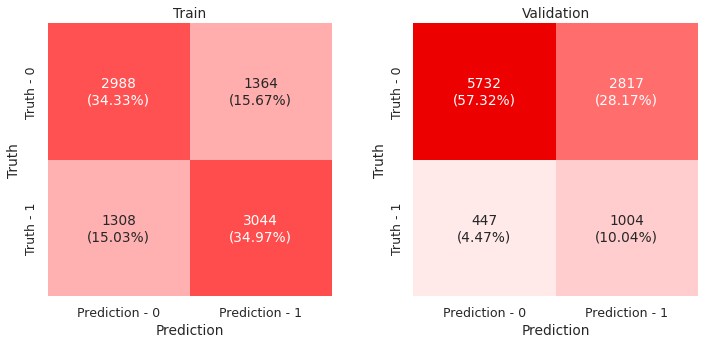

In [59]:
# Plotting the confusion matrices of the model on training and validation sets

# Reconstructing the training set
y_recon = lgc0.predict(X_train_us)
# Forecasting the validation set
y_pred  = lgc0.predict(X_val_model)

# Plotting the heatmaps of confusion matrices 
plt.figure(figsize = (10, 5));
plt.subplot(121);
plot_cm(y_train_us, y_recon);
plt.title('Train');
plt.subplot(122);
plot_cm(y_val, y_pred);
plt.title('Validation');
plt.tight_layout(w_pad = 3);

In [60]:
# Evaluation of performance metrics
model_perform = model_eval(lgc0, X_train_us, X_val_model, y_train_us, y_val, val = True)
model_perform

Accuracy Recall Precision    F1 Specificity   AUC
Train    0.693  0.699     0.691 0.695       0.687 0.763
Valid    0.674  0.692     0.263 0.381       0.670 0.746

### XGBoost Classifier

In [61]:
# Bilding the initial XGBoost classifier
xgbc0 = XGBClassifier(eval_metric = 'logloss', random_state = 1)
xgbc0 = xgbc0.fit(X_train_us, y_train_us)

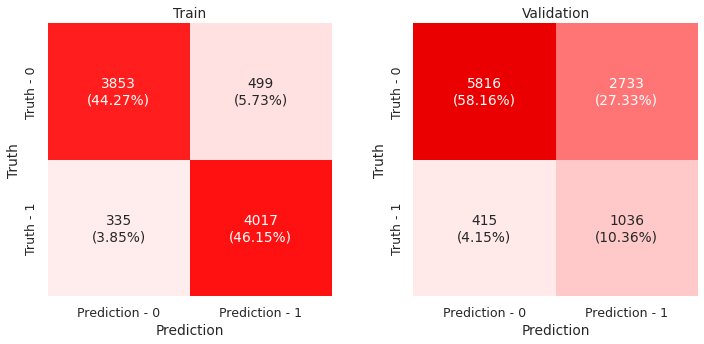

In [62]:
# Plotting the confusion matrices of the model on training and validation sets

# Reconstructing the training set
y_recon = xgbc0.predict(X_train_us)
# Forecasting the validation set
y_pred  = xgbc0.predict(X_val_model)

# Plotting the heatmaps of confusion matrices 
plt.figure(figsize = (10, 5));
plt.subplot(121);
plot_cm(y_train_us, y_recon);
plt.title('Train');
plt.subplot(122);
plot_cm(y_val, y_pred);
plt.title('Validation');
plt.tight_layout(w_pad = 3);

In [63]:
# Evaluation of performance metrics
model_perform = model_eval(xgbc0, X_train_us, X_val_model, y_train_us, y_val, val = True)
model_perform

Accuracy Recall Precision    F1 Specificity   AUC
Train    0.904  0.923     0.890 0.906       0.885 0.970
Valid    0.685  0.714     0.275 0.397       0.680 0.768

#### Observations:

*   As expected, XGBoost classifier yields far better performance scores on the validation set than the logisitc regression model, but, regrettably, it's highly overfit, as shown by the large gap between the evaluation scores of the training and validation sets. This problem is far less present for the logistic regression model, as anticipated, since the level of model complexity of XGBoost is much higher than that of logistic regression. Hopefully, model tuning can boost the validation peformance of the XGBoost classifier, and solves the issue of overfitting to some degree.
*   Note that, I also tried the logistic regression model (Logit) of statsmodels to see whether detecting and removing statistically insignificant predictors can boost the model performance, but the final model was comparable to (but slightly worse than) the present logistic regression model, so I chose to move forward with scikit-learn's logistic regression.

## Model Tuning

### Logistic Regression

In [64]:
# Defining the base estimator
cv_model = LogisticRegression(solver = 'saga', max_iter = 1000, random_state = 1)

# Defining the cross-validation training sets
X_cv = X_train_us
y_cv = y_train_us 

# Defining the range of hyperparameters
hyperparams = {'penalty': ['elasticnet'], 'l1_ratio': np.arange(0, 1.1, 0.1), 
               'C': [1e-4, 2e-4, 5e-4, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 1]}

# Looping over the entire discretized hyperparameter space
all_models = GridSearchCV(estimator = cv_model, param_grid = hyperparams, 
                          cv = 8, scoring = 'roc_auc', verbose = 1, n_jobs = -1)
all_models = all_models.fit(X_cv, y_cv)

# Choosing the best model
lgc_tuned = all_models.best_estimator_
lgc_tuned = lgc_tuned.fit(X_cv, y_cv)
print('Selected hyperparameters:\n', all_models.best_params_, sep = '')

Fitting 8 folds for each of 121 candidates, totalling 968 fits
Selected hyperparameters:
{'C': 0.005, 'l1_ratio': 0.2, 'penalty': 'elasticnet'}


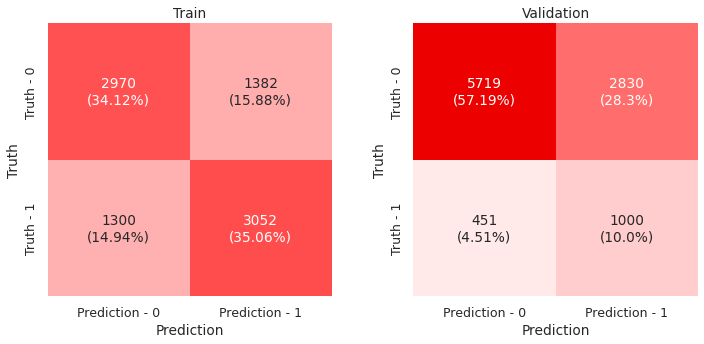

In [65]:
# Plotting the confusion matrices of the model on training and validation sets

# Reconstructing the training set
y_recon = lgc_tuned.predict(X_train_us)
# Forecasting the validation set
y_pred  = lgc_tuned.predict(X_val_model)

# Plotting the heatmaps of confusion matrices 
plt.figure(figsize = (10, 5));
plt.subplot(121);
plot_cm(y_train_us, y_recon);
plt.title('Train');
plt.subplot(122);
plot_cm(y_val, y_pred);
plt.title('Validation');
plt.tight_layout(w_pad = 3);

In [66]:
# Evaluation of performance metrics
model_perform = model_eval(lgc_tuned, X_train_us, X_val_model, y_train_us, y_val, val = True)
model_perform

Accuracy Recall Precision    F1 Specificity   AUC
Train    0.692  0.701     0.688 0.695       0.682 0.761
Valid    0.672  0.689     0.261 0.379       0.669 0.747

In [67]:
# Finding the region of uncertainty for the recall score of the model

# Setting the strategy for splitting the data into 8 random folds
kfold = StratifiedKFold(n_splits = 8, shuffle = True, random_state = 1)

# Calculating the cross-validated scores
cv_results = cross_val_score(lgc_tuned, X_train_us, y_train_us, scoring = 'roc_auc',
                             cv = kfold, n_jobs = -1)
cv_mean = cv_results.mean()
cv_std = cv_results.std()

# Reporting the model's average recall score and confidence interval
print('The average AUC score of the tuned logistic regression model is {} and,'.format(round(cv_mean, 3)), 
      'with 95% certainty, its recall score resides between {} and {}.'.format(
          round(cv_mean-2*cv_std, 3), round(cv_mean+2*cv_std, 3))) 

The average AUC score of the tuned logistic regression model is 0.756 and, with 95% certainty, its recall score resides between 0.732 and 0.78.


### XGBoost Classifier

In [68]:
# Defining the base estimator
cv_model = XGBClassifier(eval_metric = 'logloss', random_state = 1)

# Defining the cross-validation training sets
X_cv = X_train_us
y_cv = y_train_us 

# Defining the range of hyperparameters
hyperparams = {'n_estimators': np.arange(200, 1001, 200),
               'max_depth': np.arange(2, 6), 
               'subsample': np.arange(0.2, 1.01, 0.2), 
               'learning_rate': np.arange(0.01, 0.11, 0.01),
               'colsample_bytree': np.arange(0.2, 1.01, 0.2), 
               'colsample_bylevel': np.arange(0.2, 1.01, 0.2),
               'colsample_bynode': np.arange(0.2, 1.01, 0.2)}

# Looping over the entire discretized hyperparameter space
all_models = RandomizedSearchCV(estimator = cv_model, param_distributions = hyperparams, 
                                n_iter = 300, scoring = 'roc_auc', cv = 5, 
                                verbose = 1, n_jobs = -1, random_state = 1)
all_models = all_models.fit(X_cv, y_cv)

# Choosing the best model
xgbc_tuned = all_models.best_estimator_
xgbc_tuned = xgbc_tuned.fit(X_cv, y_cv)
print('Selected hyperparameters:\n', all_models.best_params_, sep = '')

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
Selected hyperparameters:
{'subsample': 0.4, 'n_estimators': 800, 'max_depth': 2, 'learning_rate': 0.05, 'colsample_bytree': 0.4, 'colsample_bynode': 0.4, 'colsample_bylevel': 0.6000000000000001}


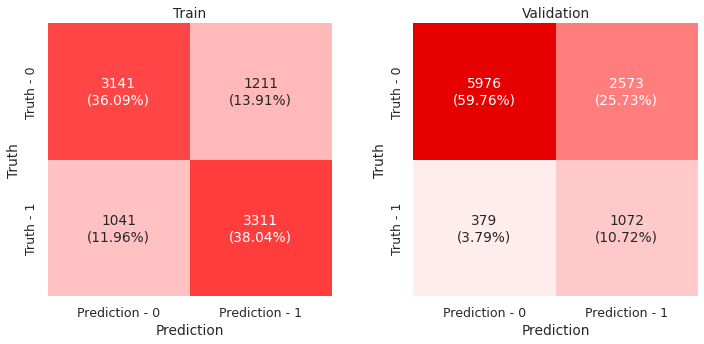

In [69]:
# Plotting the confusion matrices of the model on training and validation sets

# Reconstructing the training set
y_recon = xgbc_tuned.predict(X_train_us)
# Forecasting the validation set
y_pred  = xgbc_tuned.predict(X_val_model)

# Plotting the heatmaps of confusion matrices 
plt.figure(figsize = (10, 5));
plt.subplot(121);
plot_cm(y_train_us, y_recon);
plt.title('Train');
plt.subplot(122);
plot_cm(y_val, y_pred);
plt.title('Validation');
plt.tight_layout(w_pad = 3);

In [70]:
# Evaluation of performance metrics
model_perform = model_eval(xgbc_tuned, X_train_us, X_val_model, y_train_us, y_val, val = True)
model_perform

Accuracy Recall Precision    F1 Specificity   AUC
Train    0.741  0.761     0.732 0.746       0.722 0.821
Valid    0.705  0.739     0.294 0.421       0.699 0.794

In [71]:
# Finding the region of uncertainty for the recall score of the model

# Setting the strategy for splitting the data into 8 random folds
kfold = StratifiedKFold(n_splits = 8, shuffle = True, random_state = 1)

# Calculating the cross-validated scores
cv_results = cross_val_score(xgbc_tuned, X_train_us, y_train_us, scoring = 'roc_auc',
                             cv = kfold, n_jobs = -1)
cv_mean = cv_results.mean()
cv_std = cv_results.std()

# Reporting the model's average recall score and confidence interval
print('The average AUC score of the tuned XGBoost model is {} and,'.format(round(cv_mean, 3)), 
      'with 95% certainty, its recall score resides between {} and {}.'.format(
          round(cv_mean-2*cv_std, 3), round(cv_mean+2*cv_std, 3))) 

The average AUC score of the tuned XGBoost model is 0.796 and, with 95% certainty, its recall score resides between 0.773 and 0.818.


#### Observations:

*   Model tuning has noticeably improved the performance of the XGBoost model on the validation set, but this improvement for the logistic regression model is far less noticeable.
*   The discrepancy between the scoring metrics of the XGBoost classifier on the training and validation sets has been substantially lessened, implying that the overfitting problem of the XGBoost model has been, to some degree, alleviated, but, nonetheless, the issue is still somewhat present.
*   The confidence interval for the AUC score of both models is a bit larger than what one would've hoped for, which might be attributed to the fact that they both are still somewhat overfit, that the data we started with was very unclean and didn't contain the most effective features for classification, and, lastly, that the smaller and undersampled data was used for building the models. This is not an argument against undersampling, since, regardless, undersampled models outperformed the oversampled ones and those built using the original data. There shouldn't be any complaints against data either, since these unclean datasets are very common in most real-world business problems.

## Generating Prediction for Test Data

### Loading the Test Set

In [72]:
#test = pd.read_csv('/content/drive/MyDrive/Python_files/exercise_40_test.csv')
test = pd.read_csv('exercise_40_test.csv')

In [73]:
# Shape of dataset
print('The test set is made up of {} rows and {} columns.'.format(test.shape[0], test.shape[1]))

The test set is made up of 10000 rows and 100 columns.


### Cleaning the Test Set and Preparing It for Modeling

In [74]:
# Converting 0/1 integer columns (except for the target variable) into categorical ones with no/yes
test['x59'].replace([0, 1], ['no', 'yes'], inplace = True)
test['x98'].replace([0, 1], ['no', 'yes'], inplace = True)
test.x79 = test.x70.astype(str)
test.x79.replace(['0.0', '1.0', 'nan'], ['no', 'yes', 'unknown'], inplace = True)

test['x7'] = test['x7'].map(lambda x: float(x.split('%')[0]))
test['x19'] = test['x19'].map(lambda x: float(x.split('$')[1]))

In [75]:
# Filling out categorical features with missing values
test.loc[test['x24'].isnull(), 'x24'] = 'other'
test.loc[test['x33'].isnull(), 'x33'] = 'unknown'
test.loc[test['x77'].isnull(), 'x77'] = 'unknown'
test.loc[test['x99'].isnull(), 'x99'] = 'unknown'

In [76]:
# Getting rid of the repititions in day of the week
test.x3.replace(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'], inplace = True)

In [77]:
# Retaining only the useful variables for modeling
test_model = test[modeling_features].copy()
test_model.x3.replace(['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'], np.arange(1, 8), inplace = True)
test_model.x60.replace(month_name[1:13], np.arange(1, 13), inplace = True)

In [78]:
# Lising all columns used for imputation
num_cols = test_model.select_dtypes(include = np.number).columns.tolist()
str_impute_cols = ['x31', 'x93', 'x98']
impute_cols = num_cols + str_impute_cols

# Finding all columns with missing values in model datasets
cols_with_missing_values = []
for col in test_model.columns.tolist():
    if(test_model[col].isnull().sum()):
      cols_with_missing_values.append(col)
print('No. of features with missing values:', len(cols_with_missing_values))

No. of features with missing values: 4


In [79]:
# Making a copy testing set that will be used for imputation
test_impute = test_model[impute_cols].copy()

In [80]:
# Converting categorical variables included for imputation into numerical ones
test_impute.x31 = X_train_impute.x31.replace(['no', 'yes'], [0, 1])
test_impute.x93 = X_train_impute.x93.replace(['no', 'yes'], [0, 1])
test_impute.x98 = X_train_impute.x98.replace(['no', 'yes'], [0, 1])

# Ensuring all columns in imputation dataframes are of float type
for col in test_impute.select_dtypes(include = int).columns.tolist():
    test_impute[col] = test_impute[col].astype(float)    

In [81]:
# Scaling the data before distance-based imputation
test_impute = pd.DataFrame(preimpute_scaler.transform(test_impute), columns = test_impute.columns.tolist())
test_impute = pd.DataFrame(imputer.transform(test_impute), columns = test_impute.columns.tolist())

# Transforming imputation dataset to its pre-scaled values
test_impute = pd.DataFrame(preimpute_scaler.inverse_transform(test_impute),
                           columns = test_impute.columns.tolist())

# Filling out missing values in original test set with those found for imputation dataset
for col in cols_with_missing_values:
    test_model[col] = test_impute[col]

# Missing values after imputation
print('No. of missing values in the test set after imputation:', test_model.isnull().sum().sum())

No. of missing values in the test set after imputation: 0


In [82]:
# Adding engineered features to the datasets
X_test = test_model.copy()
X_test[['eng1', 'eng2', 'eng3']] = fa_scheme.transform(X_test[high_corr_num_vars])

# Dropping highly correlated original features
X_test.drop(columns = high_corr_num_vars, inplace = True)

In [83]:
# One-hot encoding and sacling of test set
X_test = pd.get_dummies(X_test, drop_first = True)

# Listing all one-hot encoded categorical columns
cat_cols = []
for col in X_test.columns.tolist():
    if(X_test[col].nunique() == 2):
        cat_cols.append(col)

for col in cat_cols:
    # probability of the modality
    mu = X_test[col].sum()/X_test.shape[0]   
    # Properly weighting the one-hot encoded columns before applying scaling
    X_test[col] = X_test[col]/np.sqrt(mu)

# Scaling the test sets
X_test = pd.DataFrame(modeling_scaler.transform(X_test), columns = X_test.columns.tolist())

#### Notes:

Although not shown, I conducted a comprehensive EDA on the test set, and ensured . To avoid making the code lengthy, it's not included in this submitted version.

### Making Predictions Using Best Models and Saving the Results

In [84]:
# Making prediction using tuned logistic regression
y_test_lgc = lgc_tuned.predict_proba(X_test)[:,1]
# Making prediction using tuned XGBoost classifier 
y_test_xgbc = xgbc_tuned.predict_proba(X_test)[:,1]

# Saving the forecasts
pd.Series(y_test_lgc).to_csv('glmresults.csv', index = False, header = False)
pd.Series(y_test_xgbc).to_csv('nonglmresults.csv', index = False, header = False)